In [1]:
cd /blue/vemuri/yiqiaozhang/nn/data

/blue/vemuri/yiqiaozhang/nn/data


In [2]:
# Load dependencies
import torch
from PIL import Image
import numpy as np
from numpy import asarray
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
def get_images_data(path):
    
    images_data = np.array([])
    names = sorted([name for name in os.listdir(path)])
    for name in names:
        image = Image.open('{}{}'.format(path,name)) # path
        datas = (np.asarray(image)==0).astype('float64')
        for data in datas:
            for d in data:
                images_data = np.append(images_data,d[0])
    images_data = images_data.reshape(len(names),16*16)
    
    return images_data, len(names)

In [4]:
# Get images from dataset 1
path = "../data/data1/"
images_data, image_num = get_images_data(path)
x_train = torch.from_numpy(images_data).float()
y_train = torch.from_numpy(images_data).float()

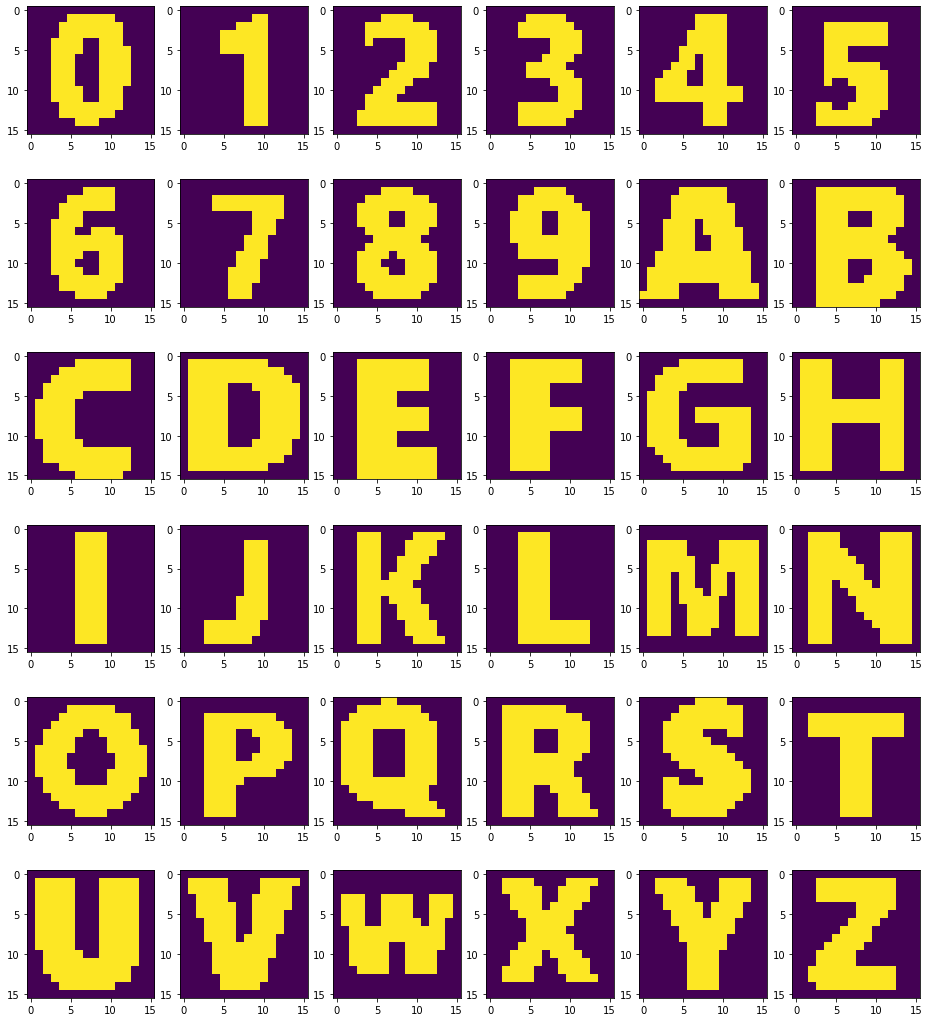

In [5]:
# Visualize training data from dataset 1
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)

for i,ax in enumerate(axes.flat):
#for i in range(image_num):
    ax.imshow(x_train[i].reshape(16,16))

In [5]:
# Step 2: develop a DNN
import torch
import torch.nn as nn
class DNN(nn.Module):

    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(16 * 16, 16*16*4)
        self.fc2 = nn.Linear(16*16*4, 16*16*8)
        self.fc3 = nn.Linear(16*16*8, 16*16)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        output = self.sigmoid(self.fc3(x))
        #output = (self.sigmoid(self.fc1(x))>=0.5).float() # not work because can't apply chain rule
        return output

model = DNN().to(device)
criterion = nn.BCELoss().to(device)
lr = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
Epoch = 5000

def eval(x_tr, y_tr):
    model.eval()
    pred_tr = model(x_tr.float())
    loss = criterion(y_tr, pred_tr)
    print("BCE-Loss: ", loss.item())
    pred_np = (pred_tr>0.5).float().detach().cpu().numpy()
    return(pred_tr, pred_np)

def train(Epoch, x_tr, y_tr):
    model.train()
    
    for epoch in range(Epoch):
        optimizer.zero_grad()
        pred_tr = model(x_tr)
        # Compute Loss
        loss = criterion(pred_tr, y_tr)

        if epoch%(Epoch/10)==0:
            print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
        # Backward pass
        loss.backward()
        optimizer.step()

In [6]:
x_train = x_train.to(device)
y_train = y_train.to(device)

In [7]:
# step 3: training process on dataset 01
print("Training...")
train(Epoch, x_train, y_train)

Training...
Epoch 0: train loss: 0.6933417916297913
Epoch 500: train loss: 0.43382105231285095
Epoch 1000: train loss: 0.37084877490997314
Epoch 1500: train loss: 0.3112648129463196
Epoch 2000: train loss: 0.2693135738372803
Epoch 2500: train loss: 0.22855313122272491
Epoch 3000: train loss: 0.19419296085834503
Epoch 3500: train loss: 0.16552753746509552
Epoch 4000: train loss: 0.14122621715068817
Epoch 4500: train loss: 0.12053786218166351


In [17]:
# step 4a
pred_train, pred_numpy = eval(x_train, y_train)

for i in range(0,36):
    print(pred_numpy[i].reshape(16,16))

BCE-Loss:  8.163915634155273
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 

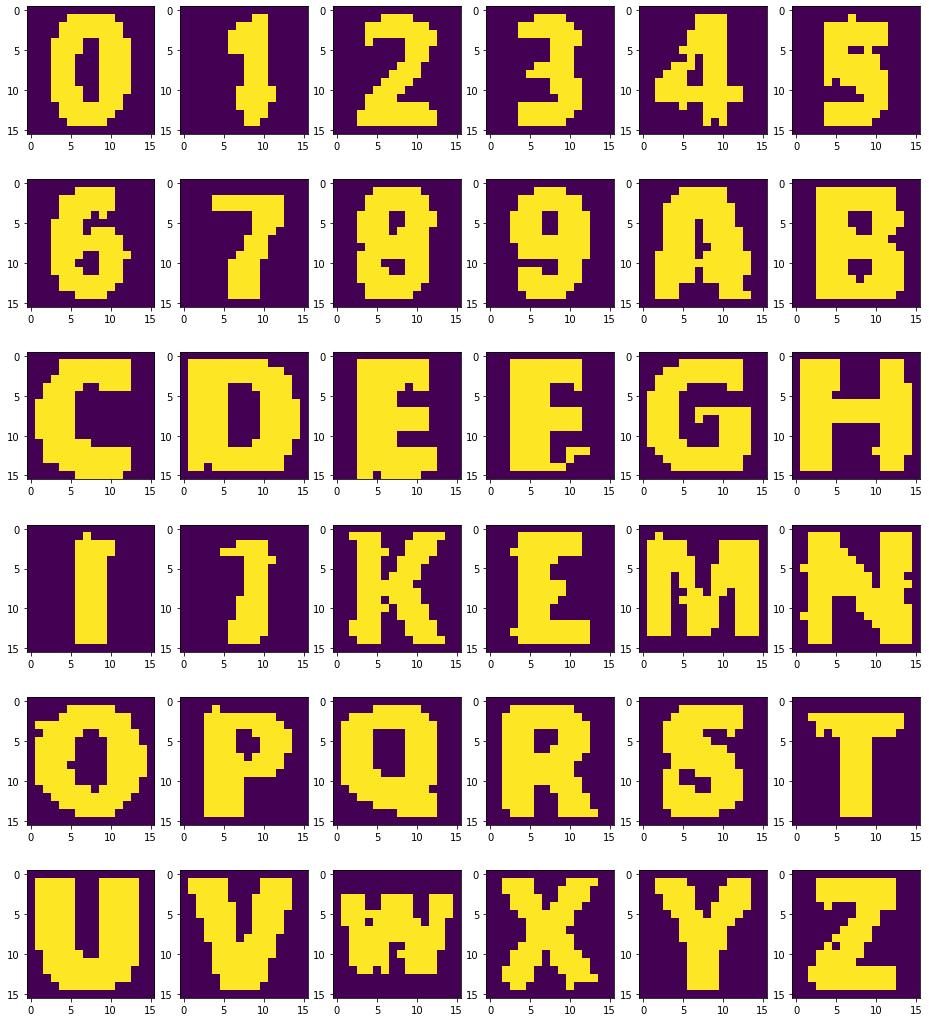

In [10]:
# step 4a predicted outcome
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)
for i,ax in enumerate(axes.flat):
    ax.imshow(pred_numpy[i].reshape(16,16))

In [8]:
# Get images from dataset 2
path = "../data/data2/"
images_data2, image_num2 = get_images_data(path)
x2, y2 = torch.from_numpy(images_data2).float(), torch.from_numpy(images_data2).float()

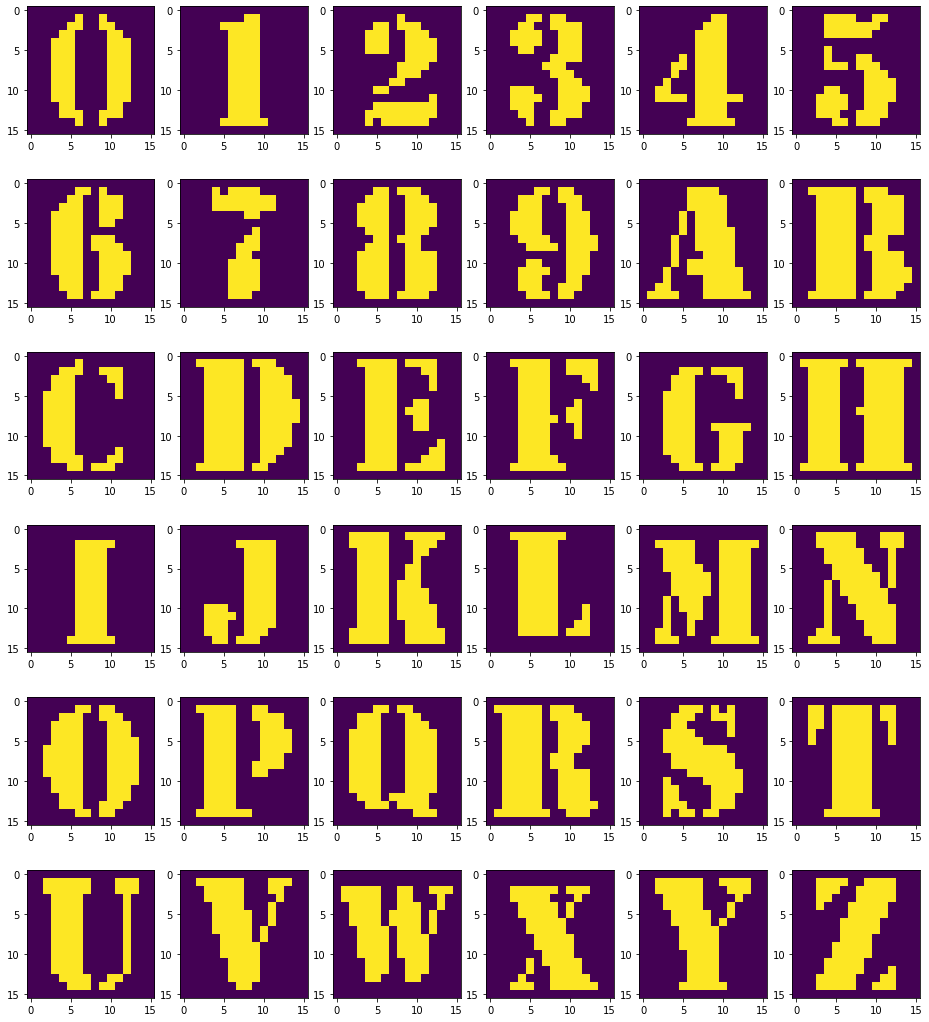

In [11]:
# Visualize images from dataset 2
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)

for i,ax in enumerate(axes.flat):
#for i in range(image_num):
    ax.imshow(x2[i].reshape(16,16))

In [9]:
x2 = x2.to(device)
y2 = y2.to(device)

In [18]:
# step 4b
pred2, pred_numpy2 = eval(x2, y2)

for i in range(0,36):
    print(pred_numpy2[i].reshape(16,16))

BCE-Loss:  16.672306060791016
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


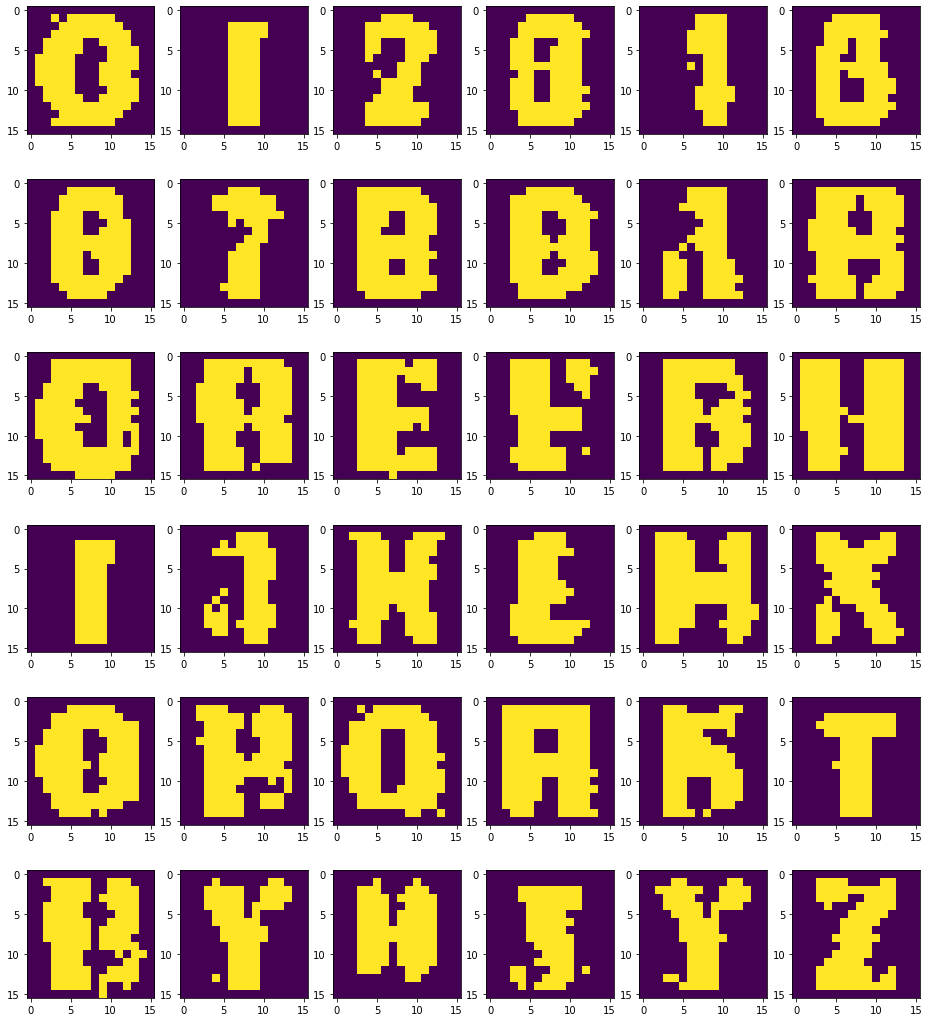

In [14]:
# step 4b predicted outcome
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)
for i,ax in enumerate(axes.flat):
    ax.imshow(pred_numpy2[i].reshape(16,16))

In [19]:
## step 4c: (i) calculate fh and ffa for data1

# after summation every entry with value 0 would be points correctly predicted as black
yhat_plus_y = np.add(pred_numpy, y_train.detach().cpu().numpy())
Fh = np.array([sum(yhat_plus_y[i] == 0)/sum(y_train[i].cpu() == 0) for i in range(36)])

# after subtraction every entry with value -1 would be points falsely predicted as black
yhat_minus_y = np.subtract(pred_numpy, y_train.detach().cpu().numpy())
Ffa = np.array([sum(yhat_minus_y[i] == -1)/sum(y_train[i].cpu() == 0) for i in range(36)])


#print(Fh)
#print(Ffa)
for i in range(Fh.size):
    print("The image {}   Fh: {:.3f}, Ffa: {:.3f}".format(i,Fh[i],Ffa[i]))

The image 0   Fh: 0.975, Ffa: 0.000
The image 1   Fh: 0.980, Ffa: 0.020
The image 2   Fh: 1.000, Ffa: 0.029
The image 3   Fh: 0.973, Ffa: 0.022
The image 4   Fh: 1.000, Ffa: 0.000
The image 5   Fh: 0.943, Ffa: 0.029
The image 6   Fh: 0.976, Ffa: 0.000
The image 7   Fh: 0.985, Ffa: 0.000
The image 8   Fh: 0.946, Ffa: 0.068
The image 9   Fh: 0.975, Ffa: 0.006
The image 10   Fh: 0.984, Ffa: 0.080
The image 11   Fh: 0.991, Ffa: 0.098
The image 12   Fh: 0.973, Ffa: 0.014
The image 13   Fh: 0.981, Ffa: 0.029
The image 14   Fh: 1.000, Ffa: 0.023
The image 15   Fh: 0.981, Ffa: 0.006
The image 16   Fh: 0.985, Ffa: 0.007
The image 17   Fh: 0.914, Ffa: 0.000
The image 18   Fh: 0.990, Ffa: 0.015
The image 19   Fh: 0.966, Ffa: 0.044
The image 20   Fh: 0.962, Ffa: 0.000
The image 21   Fh: 0.897, Ffa: 0.000
The image 22   Fh: 0.970, Ffa: 0.015
The image 23   Fh: 0.937, Ffa: 0.040
The image 24   Fh: 0.948, Ffa: 0.000
The image 25   Fh: 0.963, Ffa: 0.006
The image 26   Fh: 0.970, Ffa: 0.045
The image 2

In [20]:
## step 4c: (ii) calculate fh and ffa for data2

# after summation every entry with value 0 would be points correctly predicted as black
yhat_plus_y2 = np.add(pred_numpy2, y2.detach().cpu().numpy())
Fh2 = np.array([sum(yhat_plus_y2[i] == 0)/sum(y2[i].cpu() == 0) for i in range(36)])

# after subtraction every entry with value -1 would be points falsely predicted as black
yhat_minus_y2 = np.subtract(pred_numpy2, y2.detach().cpu().numpy())
Ffa2 = np.array([sum(yhat_minus_y2[i] == -1)/sum(y2[i].cpu() == 0) for i in range(36)])


#print(Fh)
#print(Ffa)
for i in range(Fh2.size):
    print("The image {}   Fh: {:.3f}, Ffa: {:.3f}".format(i,Fh2[i],Ffa2[i]))

The image 0   Fh: 0.694, Ffa: 0.000
The image 1   Fh: 0.990, Ffa: 0.025
The image 2   Fh: 0.879, Ffa: 0.068
The image 3   Fh: 0.799, Ffa: 0.033
The image 4   Fh: 0.963, Ffa: 0.106
The image 5   Fh: 0.791, Ffa: 0.021
The image 6   Fh: 0.852, Ffa: 0.024
The image 7   Fh: 0.932, Ffa: 0.010
The image 8   Fh: 0.848, Ffa: 0.032
The image 9   Fh: 0.780, Ffa: 0.023
The image 10   Fh: 0.924, Ffa: 0.146
The image 11   Fh: 0.922, Ffa: 0.070
The image 12   Fh: 0.592, Ffa: 0.000
The image 13   Fh: 0.864, Ffa: 0.076
The image 14   Fh: 0.788, Ffa: 0.041
The image 15   Fh: 0.881, Ffa: 0.034
The image 16   Fh: 0.740, Ffa: 0.017
The image 17   Fh: 0.917, Ffa: 0.058
The image 18   Fh: 0.990, Ffa: 0.010
The image 19   Fh: 0.921, Ffa: 0.047
The image 20   Fh: 0.884, Ffa: 0.075
The image 21   Fh: 0.879, Ffa: 0.044
The image 22   Fh: 0.772, Ffa: 0.094
The image 23   Fh: 0.855, Ffa: 0.103
The image 24   Fh: 0.777, Ffa: 0.006
The image 25   Fh: 0.831, Ffa: 0.024
The image 26   Fh: 0.818, Ffa: 0.019
The image 2

In [15]:
### step 4c question 1:
'''We think it is correct to use X' as reference for Y', 
because we want to calculate the metrics to evaluate the network's perform on test data, 
which is indepedent with training data. To see how many black points are correctly(falsely) predicted, 
we need to use test dataset X' to compare to model's prediction Y'.''' 

"We think it is correct to use X' as reference for Y', \nbecause we want to calculate the metrics to evaluate the network's perform on test data, \nwhich is indepedent with training data. To see how many black points are correctly(falsely) predicted, \nwe need to use test dataset X' to compare to model's prediction Y'."

In [16]:
### step 4c question 2:

# experiment on another ipynb
'''We would say the model performance on the training set X would be better, 
since larger image would introduce more parameters, so that bias of the model would certainly decrease, 
and model would fit training data points better;
However, it is not clear without experiment that if the test performance on the second datasest(test set) X' would be better, 
because introducing more parameters sometimes would also increase variance and leads to overfitting problem, 
so that error(measured by fh and ffa metrics) would be larger when fit the model with indepedent test data.'''

"We would say the model performance on the training set X would be better, \nsince larger image would introduce more parameters, so that bias of the model would certainly decrease, \nand model would fit training data points better;\nHowever, it is not clear without experiment that if the test performance on the second datasest(test set) X' would be better, \nbecause introducing more parameters sometimes would also increase variance and leads to overfitting problem, \nso that error(measured by fh and ffa metrics) would be larger when fit the model with indepedent test data."

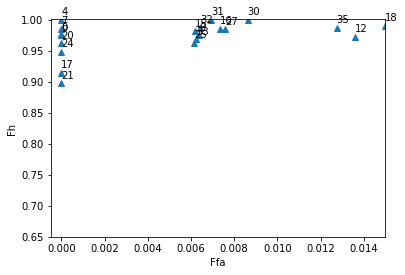

In [21]:
## step 4(d): (i) Visualize Ffa and Fh for data1
# IS IT POSSIBLE TO LABEL THE DATA POINTS BY THEIR CORRESPONDING NUMBERS??
plt.plot(Ffa, Fh, '^')
plt.axis([0, 1, 0, 1])
plt.xlabel('Ffa')
plt.ylabel('Fh')

for i in range(Fh.size):

    label = "{}".format(i)

    plt.annotate(label,
                 (Ffa[i],Fh[i]),
                 textcoords="offset points",
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='left')  # left, right or center

# adjust axis ranges
plt.xlim(-0.0005,0.015)
plt.ylim(0.65,1.0005)

plt.show()

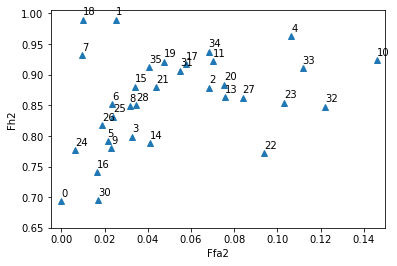

In [22]:
## step 4(d): (ii) Visualize Ffa and Fh for data2
# IS IT POSSIBLE TO LABEL THE DATA POINTS BY THEIR CORRESPONDING NUMBERS??

plt.plot(Ffa2, Fh2, '^')
plt.axis([0, 1, 0, 1])
plt.xlabel('Ffa2')
plt.ylabel('Fh2')

for i in range(Fh2.size):

    label = "{}".format(i)

    plt.annotate(label,
                 (Ffa2[i],Fh2[i]),
                 textcoords="offset points",
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='left')  # left, right or center

# adjust axis ranges
plt.xlim(-0.005,0.15)
plt.ylim(0.65,1.005)

plt.show()

Cross_section : 10
--------------
BCE-Loss:  0.8172376155853271
BCE-Loss:  0.8172562122344971
BCE-Loss:  0.8206603527069092
BCE-Loss:  0.8207109570503235
BCE-Loss:  0.8104717135429382
BCE-Loss:  0.7996383309364319
BCE-Loss:  0.7948976159095764
BCE-Loss:  0.7935737371444702
BCE-Loss:  0.8010967969894409
Table of Autoassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 16x16   = 256

   Number of Weights in an Autoassociative Deep Neural Network = 256x256x4+256x4x256x8+256x8x256 = 2,883K

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  256x256x4

   Number of Weights in Hidden Layer 2 = 256x4x256x8

   Number of Weights in Hidden Layer 3 = 256x8x256

   Number of Outputs = 16x16   = 256

             -- Gaussian Noise Standard Deviation - Cross Section Percent:10
#Test  stdev=0.000 stdev=0.001 stdev=0.002 stdev=0.003 stdev=0.005 stdev=0.010 stdev=0.020 stdev=0.030 stdev=0.050 stdev=0.100 
#Image Fh    Ffa   Fh    Ffa   Fh  

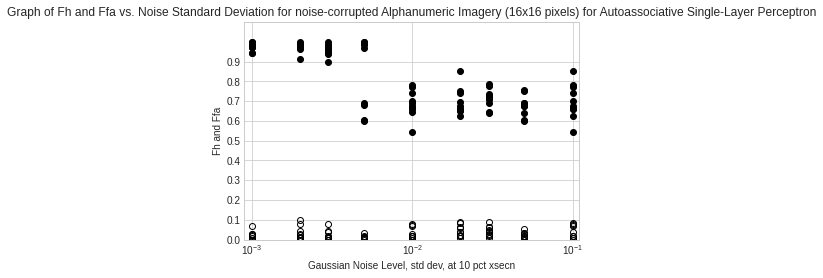

Cross_section : 20
--------------
BCE-Loss:  0.8010700345039368
BCE-Loss:  0.8010778427124023
BCE-Loss:  0.8009060621261597
BCE-Loss:  0.8009539842605591
BCE-Loss:  0.8048166036605835
BCE-Loss:  0.8076249361038208
BCE-Loss:  0.8018034100532532
BCE-Loss:  0.8034185171127319
BCE-Loss:  0.811758816242218
Table of Autoassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 16x16   = 256

   Number of Weights in an Autoassociative Deep Neural Network = 256x256x4+256x4x256x8+256x8x256 = 2,883K

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  256x256x4

   Number of Weights in Hidden Layer 2 = 256x4x256x8

   Number of Weights in Hidden Layer 3 = 256x8x256

   Number of Outputs = 16x16   = 256

             -- Gaussian Noise Standard Deviation - Cross Section Percent:20
#Test  stdev=0.000 stdev=0.001 stdev=0.002 stdev=0.003 stdev=0.005 stdev=0.010 stdev=0.020 stdev=0.030 stdev=0.050 stdev=0.100 
#Image Fh    Ffa   Fh    Ffa   Fh   

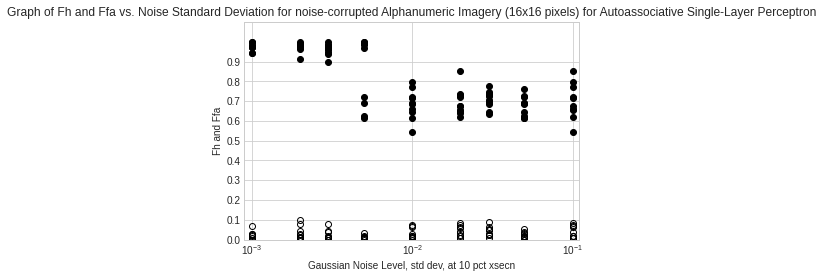

Cross_section : 25
--------------
BCE-Loss:  0.8117067813873291
BCE-Loss:  0.8156269192695618
BCE-Loss:  0.8218926191329956
BCE-Loss:  0.8214200139045715
BCE-Loss:  0.8201611042022705
BCE-Loss:  0.8212556838989258
BCE-Loss:  0.8356985449790955
BCE-Loss:  0.8636437654495239
BCE-Loss:  0.8435884714126587
Table of Autoassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 16x16   = 256

   Number of Weights in an Autoassociative Deep Neural Network = 256x256x4+256x4x256x8+256x8x256 = 2,883K

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  256x256x4

   Number of Weights in Hidden Layer 2 = 256x4x256x8

   Number of Weights in Hidden Layer 3 = 256x8x256

   Number of Outputs = 16x16   = 256

             -- Gaussian Noise Standard Deviation - Cross Section Percent:25
#Test  stdev=0.000 stdev=0.001 stdev=0.002 stdev=0.003 stdev=0.005 stdev=0.010 stdev=0.020 stdev=0.030 stdev=0.050 stdev=0.100 
#Image Fh    Ffa   Fh    Ffa   Fh  

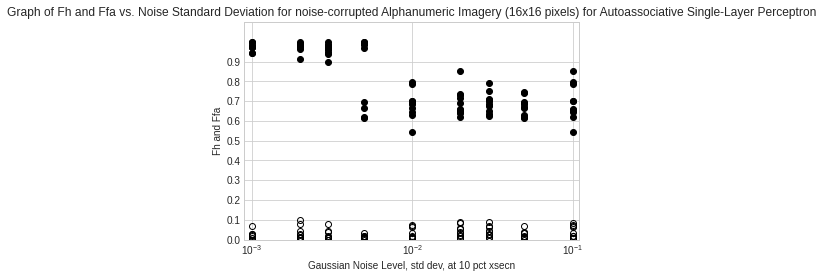

Cross_section : 30
--------------
BCE-Loss:  0.8435697555541992
BCE-Loss:  0.8418768048286438
BCE-Loss:  0.8433001041412354
BCE-Loss:  0.8424695730209351
BCE-Loss:  0.844822108745575
BCE-Loss:  0.8481668829917908
BCE-Loss:  0.8614543676376343
BCE-Loss:  0.857281506061554
BCE-Loss:  0.8788852691650391
Table of Autoassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 16x16   = 256

   Number of Weights in an Autoassociative Deep Neural Network = 256x256x4+256x4x256x8+256x8x256 = 2,883K

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  256x256x4

   Number of Weights in Hidden Layer 2 = 256x4x256x8

   Number of Weights in Hidden Layer 3 = 256x8x256

   Number of Outputs = 16x16   = 256

             -- Gaussian Noise Standard Deviation - Cross Section Percent:30
#Test  stdev=0.000 stdev=0.001 stdev=0.002 stdev=0.003 stdev=0.005 stdev=0.010 stdev=0.020 stdev=0.030 stdev=0.050 stdev=0.100 
#Image Fh    Ffa   Fh    Ffa   Fh    

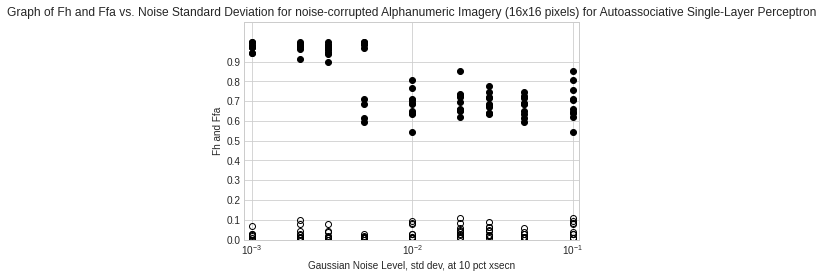

Cross_section : 35
--------------
BCE-Loss:  0.8705108165740967
BCE-Loss:  0.8795167207717896
BCE-Loss:  0.8795532584190369
BCE-Loss:  0.8786680102348328
BCE-Loss:  0.8795706629753113
BCE-Loss:  0.8808712363243103
BCE-Loss:  0.8762139081954956
BCE-Loss:  0.8771845698356628
BCE-Loss:  0.9004783630371094
Table of Autoassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 16x16   = 256

   Number of Weights in an Autoassociative Deep Neural Network = 256x256x4+256x4x256x8+256x8x256 = 2,883K

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  256x256x4

   Number of Weights in Hidden Layer 2 = 256x4x256x8

   Number of Weights in Hidden Layer 3 = 256x8x256

   Number of Outputs = 16x16   = 256

             -- Gaussian Noise Standard Deviation - Cross Section Percent:35
#Test  stdev=0.000 stdev=0.001 stdev=0.002 stdev=0.003 stdev=0.005 stdev=0.010 stdev=0.020 stdev=0.030 stdev=0.050 stdev=0.100 
#Image Fh    Ffa   Fh    Ffa   Fh  

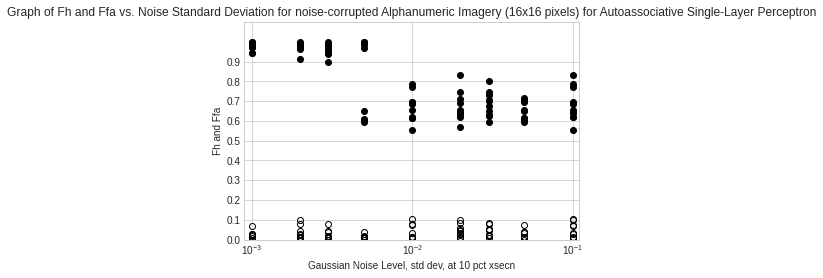

In [25]:
#step5
import random
seed = 1
sigma = np.array([0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1])
cross_section = np.array([10,20,25,30,35])

Fh_list = np.zeros(360) # 100 = 36 images * 10 sigma case
Ffa_list = np.zeros(360)

# Repeat the same procedure 10 times.We are calculating for 5 different cross-sections.
for k in range(5):
    print('Cross_section : {}'.format(cross_section[k]))
 
    
    print("--------------")

    Fh_temp_list = np.array([])
    Ffa_temp_list = np.array([])

    Fh_temp_list = np.append(Fh_temp_list, Fh) # stdev = 0
    Ffa_temp_list = np.append(Ffa_temp_list, Ffa) # stdev = 0

    for case in range(9):
        x = x2
        for img in range(36):    
        
            for i in range(int(256*cross_section[k]/100)):
                seed+=random.randint(0,100)
                random.seed(seed)
                rindex = torch.randint(int(i*100/cross_section[k]),int((i+1)*100/cross_section[k]),(1,)) #np.random.choice(range(i*cross_section[k],(i+1)*cross_section[k]))
                noise = torch.normal(0,sigma[case],(1,)).to(device) #np.random.normal(0,sigma[case],1) 
                x[img, rindex] += noise
            x[img] = x[img] - torch.min(x[img])
            x[img] = x[img] / torch.max(x[img])

        y = x

        pred_train, pred_numpy = eval(x, y)

    # after summation every entry with value 0 would be points correctly predicted as black
        yhat_plus_y = np.add(pred_numpy, y2.detach().cpu().numpy())
        Fh_temp = np.array([sum(yhat_plus_y[i] == 0)/sum(y2[i].cpu() == 0) for i in range(36)])
        Fh_temp_list = np.append(Fh_temp_list, Fh_temp)

    # after subtraction every entry with value -1 would be points falsely predicted as black
        yhat_minus_y = np.subtract(pred_numpy, y2.detach().cpu().numpy())
        Ffa_temp = np.array([sum(yhat_minus_y[i] == -1)/sum(y2[i].cpu() == 0) for i in range(36)])
        Ffa_temp_list = np.append(Ffa_temp_list, Ffa_temp)


    Fh_list = Fh_temp_list
    Ffa_list = Ffa_temp_list

    print("Table of Autoassociative Deep Neural Network Response to Noisy Input\n")
    print("   Number of Inputs  = 16x16   = 256\n")
    print("   Number of Weights in an Autoassociative Deep Neural Network = 256x256x4+256x4x256x8+256x8x256 = 2,883K\n")
    print("   Number of Hidden Layers in This DNN = 3\n")
    print("   Number of Weights in Hidden Layer 1 =  256x256x4\n")
    print("   Number of Weights in Hidden Layer 2 = 256x4x256x8\n")
    print("   Number of Weights in Hidden Layer 3 = 256x8x256\n")
    print("   Number of Outputs = 16x16   = 256\n")
    print ("             -- Gaussian Noise Standard Deviation - Cross Section Percent:{}".format(cross_section[k]))

    s1 = "#Test  stdev={:<6.3f}".format(0)
    s2 = "#Image {:<12}".format("Fh    Ffa")

    for sig in sigma:
        s1+="stdev={:<6.3f}".format(sig)
        s2+="{:<12}".format("Fh    Ffa")
    print(s1+"\n"+s2+"\n")

    Fh_matrix = Fh_list.reshape(10,36).transpose()
    Ffa_matrix = Ffa_list.reshape(10,36).transpose()

    for i in range(36):
        s = '"{}"    '.format(i)
        for case in range(10):
            s+="{:<6.2f}".format(Fh_matrix[i][case])
            s+="{:<6.2f}".format(Ffa_matrix[i][case])
        print(s)

    # print(Ffa_list)
    # print(Fh_list)

    # Step 6b

    %matplotlib inline
    import matplotlib.pyplot as plt
    import pylab

    plt.style.use('seaborn-whitegrid')
    for i in range(0,10):
        #SD=0.001
        plt.plot(0.001,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.001,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(10,20):
        #SD=0.002
        plt.plot(0.002,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.002,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(20,30):
        #SD=0.003
        plt.plot(0.003,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.003,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(30,40):
        #SD=0.005
        plt.plot(0.005,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.005,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(40,50):
        #SD=0.01
        plt.plot(0.01,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.01,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(50,60):
        #SD=0.02
        plt.plot(0.02,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.02,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(60,70):
        #SD=0.03
        plt.plot(0.03,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.03,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(70,80):
        #SD=0.05
        plt.plot(0.05,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.05,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(80,90):
        #SD=0.1
        plt.plot(0.1,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.1,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
        
    plt.xscale('log')
    plt.xlabel('Gaussian Noise Level, std dev, at 10 pct xsecn')
    plt.ylabel('Fh and Ffa')
    plt.title('Graph of Fh and Ffa vs. Noise Standard Deviation for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative Single-Layer Perceptron')
    plt.yticks(np.arange(0,1,0.1))
    plt.xlim([0.0009,0.1101])
    plt.ylim([0,1.1])

    plt.show()

In [4]:
# step 7 
def get_gesture_data(path):
    
    images_data = np.array([])
    names = sorted([name for name in os.listdir(path)])
    for name in names:
        image = Image.open('{}{}'.format(path,name)) # path
        #display(image)
        datas = (np.asarray(image)).astype('float64')
        for data in datas:
            for d in data:
                images_data = np.append(images_data,d[0]/255)
    images_data = images_data.reshape(len(names),64*64)
    
    return images_data, len(names)

path = "../data/data3_64x64/"
gestures_data, gestures_num = get_gesture_data(path)

path = "../data/data1/"
images_data, image_num = get_images_data(path)

In [5]:
gx_train = torch.from_numpy(gestures_data).float()
a2i, k2y = images_data[10:10+9], images_data[10+10:10+10+15]
gy_train = torch.from_numpy(np.concatenate((a2i,k2y))).float()

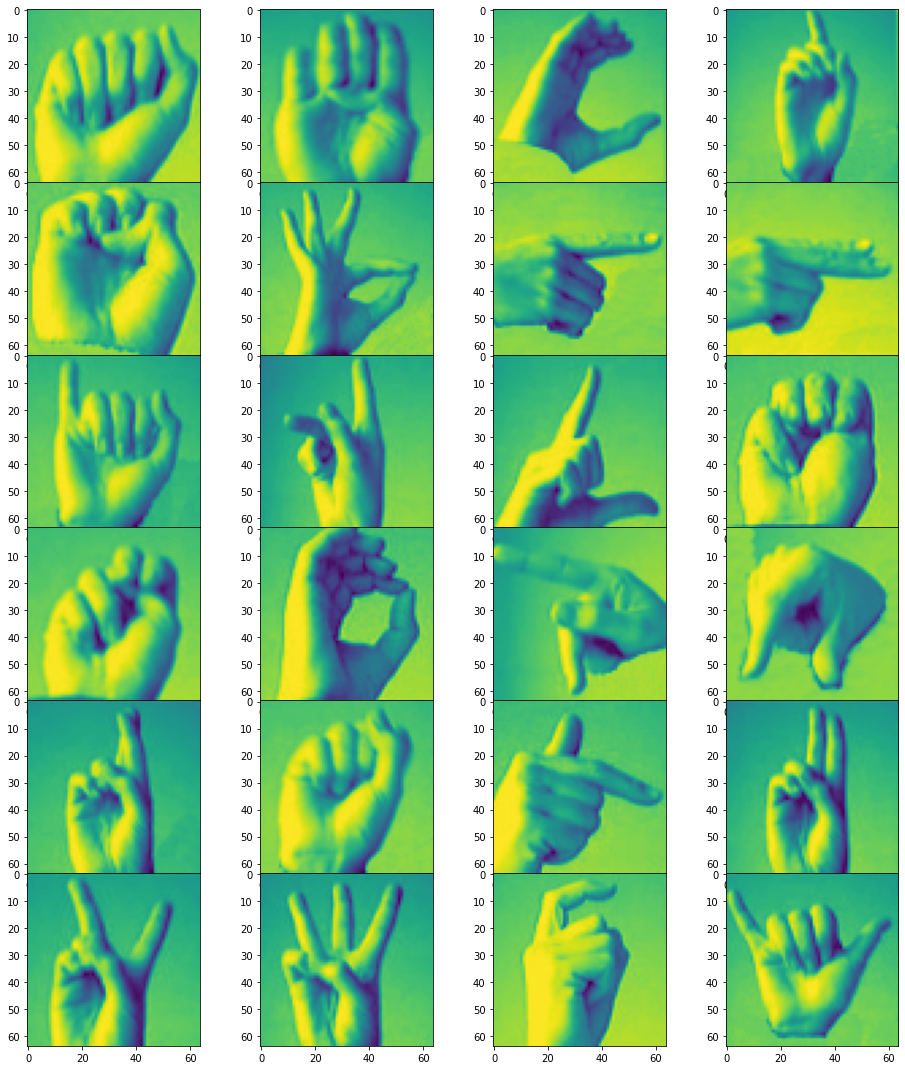

In [6]:
# Visualize training data from dataset 3
fig, axes = plt.subplots(6,4, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)

for i,ax in enumerate(axes.flat):
    ax.imshow(gx_train[i].reshape(64,64))

In [6]:
# Step 7.2: develop a DNN
import torch
import torch.nn as nn

class DNN7(nn.Module):

    def __init__(self):
        super(DNN7, self).__init__()
        self.fc1 = nn.Linear(64*64, 64*64*4)
        self.fc2 = nn.Linear(64*64*4, 64*64*8)
        self.fc3 = nn.Linear(64*64*8, 16*16)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        output = self.sigmoid(self.fc3(x))
        return output

model_7 = DNN7().to(device)
criterion = nn.BCELoss().to(device)
lr = 0.1
optimizer = torch.optim.SGD(model_7.parameters(), lr = lr)
Epoch = 2000

In [7]:
def eval7(x_tr, y_tr):
    model_7.eval()
    pred_tr = model_7(x_tr)
    loss = criterion(pred_tr, y_tr)
    print("BCE-Loss: ", loss.item())
    pred_np = (pred_tr>0.5).float().detach().cpu().numpy()
    return(pred_tr, pred_np)

def train_7(Epoch, x_tr, y_tr):
    model_7.train()
    
    for epoch in range(Epoch):
        optimizer.zero_grad()
        pred_tr = model_7(x_tr.float())
        # Compute Loss
        loss = criterion(pred_tr,y_tr)

        if epoch%(Epoch/10)==0:
            print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
        # Backward pass
        loss.backward()
        optimizer.step()

In [8]:
gx_train = gx_train.to(device)
gy_train = gy_train.to(device)

In [9]:
# step 7.3: training process on dataset 03
print("Training...")
train_7(Epoch, gx_train, gy_train)

Training...
Epoch 0: train loss: 0.6947905421257019
Epoch 200: train loss: 0.4547044634819031
Epoch 400: train loss: 0.4325708746910095
Epoch 600: train loss: 0.3938539922237396
Epoch 800: train loss: 0.3418317437171936
Epoch 1000: train loss: 0.30977070331573486
Epoch 1200: train loss: 0.2741290032863617
Epoch 1400: train loss: 0.22106924653053284
Epoch 1600: train loss: 0.1817570924758911
Epoch 1800: train loss: 0.15248510241508484


In [10]:
# step 7.4a
pred_train7, pred_numpy7 = eval7(gx_train, gy_train)

for i in range(0,10):
    print(pred_numpy7[i].reshape(16,16))

BCE-Loss:  0.1456659436225891
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.]


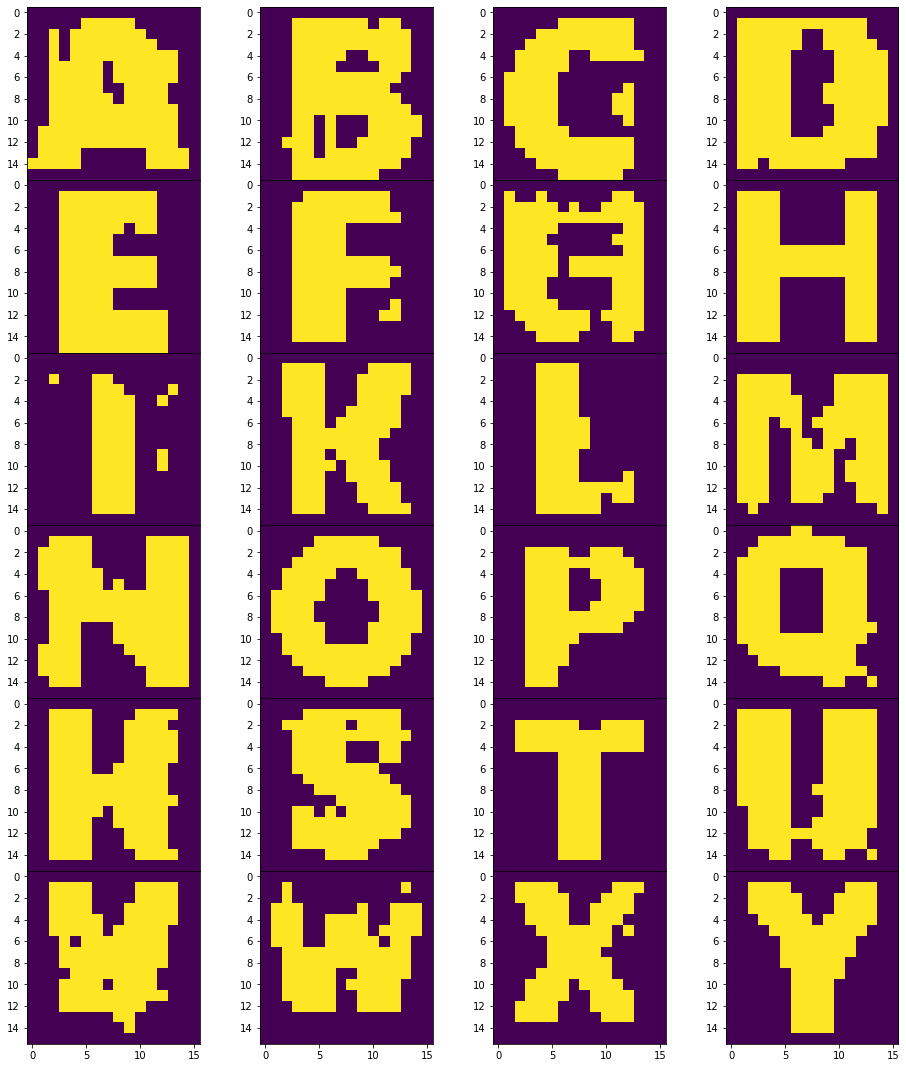

In [11]:
# step 7.4a predicted outcome
fig, axes = plt.subplots(6,4, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)
for i,ax in enumerate(axes.flat):
    ax.imshow(pred_numpy7[i].reshape(16,16))

In [12]:
# step 7.4c for dataset 3

# after summation every entry with value 0 would be points correctly predicted as black
yhat_plus_y7 = np.add(pred_numpy7, gy_train.detach().cpu().numpy())
Fh7 = np.array([sum(yhat_plus_y7[i] == 0)/sum(gy_train[i].cpu() == 0) for i in range(24)])

# after subtraction every entry with value -1 would be points falsely predicted as black
yhat_minus_y7= np.subtract(pred_numpy7, gy_train.detach().cpu().numpy())
Ffa7 = np.array([sum(yhat_minus_y7[i] == -1)/sum(gy_train[i].cpu() == 0) for i in range(24)])

  
#print(Fh)
#print(Ffa)
for i in range(Fh7.size):
    print("The image {}   Fh: {:.3f}, Ffa: {:.3f}".format(i,Fh7[i],Ffa7[i]))

The image 0   Fh: 0.896, Ffa: 0.024
The image 1   Fh: 0.982, Ffa: 0.054
The image 2   Fh: 0.952, Ffa: 0.020
The image 3   Fh: 0.952, Ffa: 0.057
The image 4   Fh: 1.000, Ffa: 0.008
The image 5   Fh: 0.969, Ffa: 0.006
The image 6   Fh: 0.868, Ffa: 0.132
The image 7   Fh: 1.000, Ffa: 0.000
The image 8   Fh: 0.975, Ffa: 0.035
The image 9   Fh: 0.905, Ffa: 0.006
The image 10   Fh: 0.978, Ffa: 0.022
The image 11   Fh: 0.947, Ffa: 0.023
The image 12   Fh: 0.897, Ffa: 0.024
The image 13   Fh: 1.000, Ffa: 0.000
The image 14   Fh: 1.000, Ffa: 0.025
The image 15   Fh: 0.985, Ffa: 0.015
The image 16   Fh: 0.871, Ffa: 0.091
The image 17   Fh: 0.949, Ffa: 0.074
The image 18   Fh: 1.000, Ffa: 0.011
The image 19   Fh: 0.974, Ffa: 0.069
The image 20   Fh: 0.917, Ffa: 0.090
The image 21   Fh: 0.968, Ffa: 0.019
The image 22   Fh: 0.994, Ffa: 0.025
The image 23   Fh: 0.982, Ffa: 0.012


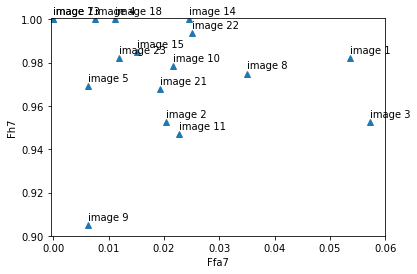

In [13]:
# step 7.4d for dataset 3 Visualize Ffa and Fh
plt.plot(Ffa7, Fh7, '^')
plt.axis([0, 1, 0, 1])
plt.xlabel('Ffa7')
plt.ylabel('Fh7')

for i in range(Fh7.size):

    label = "image {}".format(i)

    plt.annotate(label,
                 (Ffa7[i],Fh7[i]),
                 textcoords="offset points",
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='left')  # left, right or center

# adjust axis ranges
plt.xlim(-0.0005,0.06)
plt.ylim(0.90,1.0005)

plt.show()

Cross_section : 10
--------------
BCE-Loss:  0.12267938256263733
BCE-Loss:  0.12273555248975754
BCE-Loss:  0.12278812378644943
BCE-Loss:  0.12295322865247726
BCE-Loss:  0.12332163751125336
BCE-Loss:  0.124890998005867
BCE-Loss:  0.12672704458236694
BCE-Loss:  0.13073492050170898
BCE-Loss:  0.14520785212516785
Table of Heteroassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 64x64   = 4096

   Number of Weights in an HeteroAssociative Deep Neural Network = 4096x4096x4+4096x4x4096x8+4096x8x256 = 612M

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  4096x4096x4

   Number of Weights in Hidden Layer 2 = 4096x4x4096x8

   Number of Weights in Hidden Layer 3 = 4096x8x256

   Number of Outputs = 16x16   = 256

             -- Gaussian Noise Standard Deviation - Cross Section Percent:10
#Test  stdev=0.000 stdev=0.001 stdev=0.002 stdev=0.003 stdev=0.005 stdev=0.010 stdev=0.020 stdev=0.030 stdev=0.050 stdev=0.100 
#Image Fh    Ff

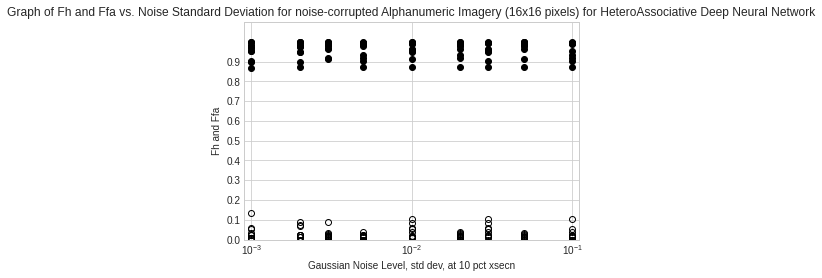

Cross_section : 20
--------------
BCE-Loss:  0.14518430829048157
BCE-Loss:  0.14514976739883423
BCE-Loss:  0.14516541361808777
BCE-Loss:  0.1452229619026184
BCE-Loss:  0.14514261484146118
BCE-Loss:  0.1449495404958725
BCE-Loss:  0.14582422375679016
BCE-Loss:  0.14592444896697998
BCE-Loss:  0.15647640824317932
Table of Heteroassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 64x64   = 4096

   Number of Weights in an HeteroAssociative Deep Neural Network = 4096x4096x4+4096x4x4096x8+4096x8x256 = 612M

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  4096x4096x4

   Number of Weights in Hidden Layer 2 = 4096x4x4096x8

   Number of Weights in Hidden Layer 3 = 4096x8x256

   Number of Outputs = 16x16   = 256

             -- Gaussian Noise Standard Deviation - Cross Section Percent:20
#Test  stdev=0.000 stdev=0.001 stdev=0.002 stdev=0.003 stdev=0.005 stdev=0.010 stdev=0.020 stdev=0.030 stdev=0.050 stdev=0.100 
#Image Fh    Ff

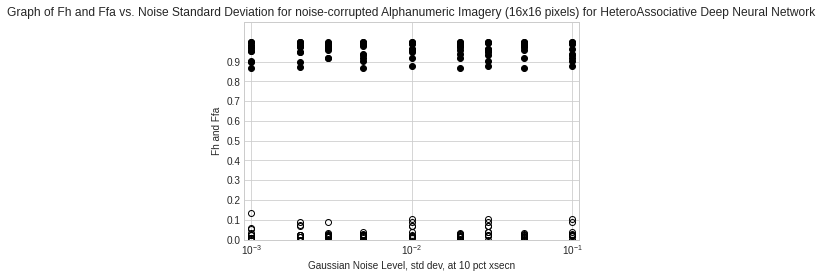

Cross_section : 25
--------------
BCE-Loss:  0.1565018594264984
BCE-Loss:  0.15652060508728027
BCE-Loss:  0.15656879544258118
BCE-Loss:  0.15644218027591705
BCE-Loss:  0.15649642050266266
BCE-Loss:  0.15676602721214294
BCE-Loss:  0.157521054148674
BCE-Loss:  0.15933191776275635
BCE-Loss:  0.17516997456550598
Table of Heteroassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 64x64   = 4096

   Number of Weights in an HeteroAssociative Deep Neural Network = 4096x4096x4+4096x4x4096x8+4096x8x256 = 612M

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  4096x4096x4

   Number of Weights in Hidden Layer 2 = 4096x4x4096x8

   Number of Weights in Hidden Layer 3 = 4096x8x256

   Number of Outputs = 16x16   = 256

             -- Gaussian Noise Standard Deviation - Cross Section Percent:25
#Test  stdev=0.000 stdev=0.001 stdev=0.002 stdev=0.003 stdev=0.005 stdev=0.010 stdev=0.020 stdev=0.030 stdev=0.050 stdev=0.100 
#Image Fh    Ffa

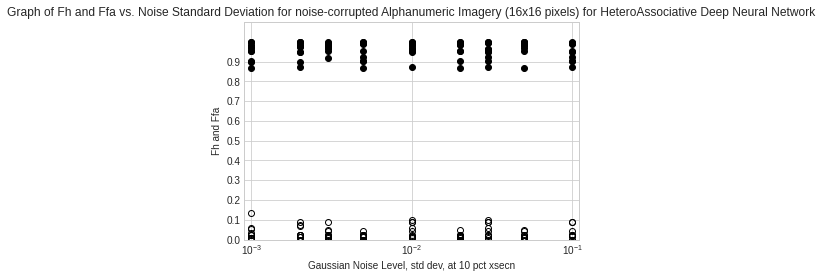

Cross_section : 30
--------------
BCE-Loss:  0.17520904541015625
BCE-Loss:  0.175230473279953
BCE-Loss:  0.17525248229503632
BCE-Loss:  0.17544680833816528
BCE-Loss:  0.17563974857330322
BCE-Loss:  0.17589299380779266
BCE-Loss:  0.17687475681304932
BCE-Loss:  0.17954006791114807
BCE-Loss:  0.19166240096092224
Table of Heteroassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 64x64   = 4096

   Number of Weights in an HeteroAssociative Deep Neural Network = 4096x4096x4+4096x4x4096x8+4096x8x256 = 612M

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  4096x4096x4

   Number of Weights in Hidden Layer 2 = 4096x4x4096x8

   Number of Weights in Hidden Layer 3 = 4096x8x256

   Number of Outputs = 16x16   = 256

             -- Gaussian Noise Standard Deviation - Cross Section Percent:30
#Test  stdev=0.000 stdev=0.001 stdev=0.002 stdev=0.003 stdev=0.005 stdev=0.010 stdev=0.020 stdev=0.030 stdev=0.050 stdev=0.100 
#Image Fh    Ff

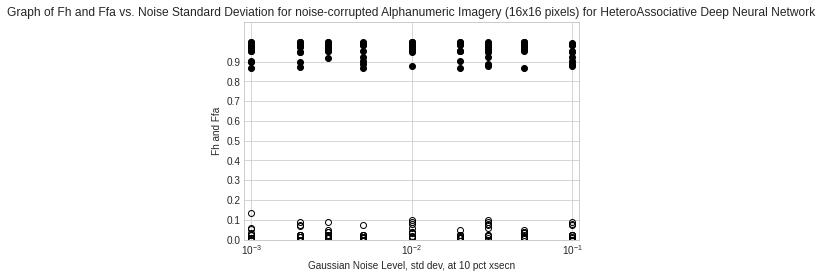

Cross_section : 35
--------------
BCE-Loss:  0.19163762032985687
BCE-Loss:  0.19158422946929932
BCE-Loss:  0.19155201315879822
BCE-Loss:  0.19137391448020935
BCE-Loss:  0.1914658546447754
BCE-Loss:  0.1913568079471588
BCE-Loss:  0.19119010865688324
BCE-Loss:  0.19344696402549744
BCE-Loss:  0.21496573090553284
Table of Heteroassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 64x64   = 4096

   Number of Weights in an HeteroAssociative Deep Neural Network = 4096x4096x4+4096x4x4096x8+4096x8x256 = 612M

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  4096x4096x4

   Number of Weights in Hidden Layer 2 = 4096x4x4096x8

   Number of Weights in Hidden Layer 3 = 4096x8x256

   Number of Outputs = 16x16   = 256

             -- Gaussian Noise Standard Deviation - Cross Section Percent:35
#Test  stdev=0.000 stdev=0.001 stdev=0.002 stdev=0.003 stdev=0.005 stdev=0.010 stdev=0.020 stdev=0.030 stdev=0.050 stdev=0.100 
#Image Fh    Ff

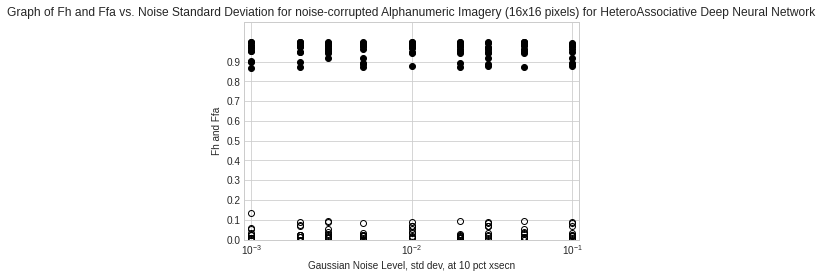

In [14]:
#step 7.5
import random
seed = 1
sigma = np.array([0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1])
cross_section = np.array([10,20,25,30,35])

Fh_list = np.zeros(240) # 100 = 24 images * 10 sigma case
Ffa_list = np.zeros(240)

# Repeat the same procedure 10 times.We are calculating for 5 different cross-sections.
for k in range(5):
    print('Cross_section : {}'.format(cross_section[k]))
 
    
    print("--------------")

    Fh_temp_list = np.array([])
    Ffa_temp_list = np.array([])

    Fh_temp_list = np.append(Fh_temp_list, Fh7) # stdev = 0
    Ffa_temp_list = np.append(Ffa_temp_list, Ffa7) # stdev = 0

    for case in range(9):
        x = gx_train
        y = gy_train
        for img in range(24):    
        
            for i in range(int(64*64*(cross_section[k]/100))):
                seed+=random.randint(0,100)
                random.seed(seed)
                rindex = torch.randint(int(i*100/cross_section[k]),int((i+1)*100/cross_section[k]),(1,)) #np.random.choice(range(i*cross_section[k],(i+1)*cross_section[k]))
                noise = torch.normal(0,sigma[case],(1,)).to(device) #np.random.normal(0,sigma[case],1) 
                x[img, rindex] += noise
            x[img] = x[img] - torch.min(x[img])
            x[img] = x[img] / torch.max(x[img])


        pred_train, pred_numpy = eval7(x, y)

    # after summation every entry with value 0 would be points correctly predicted as black
        yhat_plus_y = np.add(pred_numpy, gy_train.detach().cpu().numpy())
        Fh_temp = np.array([sum(yhat_plus_y[i] == 0)/sum(gy_train[i].cpu() == 0) for i in range(24)])
        Fh_temp_list = np.append(Fh_temp_list, Fh_temp)

    # after subtraction every entry with value -1 would be points falsely predicted as black
        yhat_minus_y = np.subtract(pred_numpy, gy_train.detach().cpu().numpy())
        Ffa_temp = np.array([sum(yhat_minus_y[i] == -1)/sum(gy_train[i].cpu() == 0) for i in range(24)])
        Ffa_temp_list = np.append(Ffa_temp_list, Ffa_temp)


    Fh_list = Fh_temp_list
    Ffa_list = Ffa_temp_list

    print("Table of Heteroassociative Deep Neural Network Response to Noisy Input\n")
    print("   Number of Inputs  = 64x64   = 4096\n")
    print("   Number of Weights in an HeteroAssociative Deep Neural Network = 4096x4096x4+4096x4x4096x8+4096x8x256 = 612M\n")
    print("   Number of Hidden Layers in This DNN = 3\n")
    print("   Number of Weights in Hidden Layer 1 =  4096x4096x4\n")
    print("   Number of Weights in Hidden Layer 2 = 4096x4x4096x8\n")
    print("   Number of Weights in Hidden Layer 3 = 4096x8x256\n")
    print("   Number of Outputs = 16x16   = 256\n")
    print ("             -- Gaussian Noise Standard Deviation - Cross Section Percent:{}".format(cross_section[k]))

    s1 = "#Test  stdev={:<6.3f}".format(0)
    s2 = "#Image {:<12}".format("Fh    Ffa")

    for sig in sigma:
        s1+="stdev={:<6.3f}".format(sig)
        s2+="{:<12}".format("Fh    Ffa")
    print(s1+"\n"+s2+"\n")

    Fh_matrix = Fh_list.reshape(10,24).transpose()
    Ffa_matrix = Ffa_list.reshape(10,24).transpose()

    for i in range(24):
        s = '"{}"    '.format(i)
        for case in range(10):
            s+="{:<6.2f}".format(Fh_matrix[i][case])
            s+="{:<6.2f}".format(Ffa_matrix[i][case])
        print(s)

    # print(Ffa_list)
    # print(Fh_list)

    # Step 7.6b

    %matplotlib inline
    import matplotlib.pyplot as plt
    import pylab

    plt.style.use('seaborn-whitegrid')
    for i in range(0,10):
        #SD=0.001
        plt.plot(0.001,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.001,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(10,20):
        #SD=0.002
        plt.plot(0.002,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.002,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(20,30):
        #SD=0.003
        plt.plot(0.003,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.003,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(30,40):
        #SD=0.005
        plt.plot(0.005,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.005,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(40,50):
        #SD=0.01
        plt.plot(0.01,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.01,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(50,60):
        #SD=0.02
        plt.plot(0.02,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.02,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(60,70):
        #SD=0.03
        plt.plot(0.03,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.03,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(70,80):
        #SD=0.05
        plt.plot(0.05,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.05,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(80,90):
        #SD=0.1
        plt.plot(0.1,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.1,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
        
    plt.xscale('log')
    plt.xlabel('Gaussian Noise Level, std dev, at 10 pct xsecn')
    plt.ylabel('Fh and Ffa')
    plt.title('Graph of Fh and Ffa vs. Noise Standard Deviation for noise-corrupted Alphanumeric Imagery (16x16 pixels) for HeteroAssociative Deep Neural Network')
    plt.yticks(np.arange(0,1,0.1))
    plt.xlim([0.0009,0.1101])
    plt.ylim([0,1.1])

    plt.show()

In [1]:
### For extra credits #####
# Load dependencies
import torch
from PIL import Image
import numpy as np
from numpy import asarray
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import os

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
# Same as previous part
def get_images_data(path):
    
    images_data = np.array([])
    names = sorted([name for name in os.listdir(path)])
    for name in names:
        image = Image.open('{}{}'.format(path,name)) # path
        datas = (np.asarray(image)==0).astype('float64')
        for data in datas:
            for d in data:
                images_data = np.append(images_data,d[0])
    images_data = images_data.reshape(len(names),16*16)
    
    return images_data, len(names)

In [4]:
# Get images from dataset 1
path = "../data/data1/"
images_data, image_num = get_images_data(path)
x_train= torch.from_numpy(images_data).float()

In [5]:
# encode the features
encode_feature = np.array([
    # dash v-line slant+ slant- rightbow leftbow downbow topbow
    [0,0,0,0,0,0,1,1], #0
    [0,1,0,0,0,0,0,0], #1
    [1,0,0,0,0,1,0,0], #2
    [0,0,0,0,0,2,0,0], #3
    [1,1,1,0,0,0,0,0], #4
    [1,1,0,0,0,1,0,0], #5
    [0,0,0,0,1,0,1,1], #6
    [1,2,0,0,0,0,0,0], #7
    [0,0,0,0,2,2,0,0], #8
    [0,1,0,0,1,1,0,0], #9
    [1,0,1,1,0,0,0,0], #A
    [0,1,0,0,0,2,0,0], #B
    [0,0,0,0,1,0,0,0], #C
    [0,1,0,0,0,1,0,0], #D
    [3,1,0,0,0,0,0,0], #E
    [2,1,0,0,0,0,0,0], #F
    [1,1,0,0,1,0,0,0], #G
    [1,2,0,0,0,0,0,0], #H
    [2,1,0,0,0,0,0,0], #I
    [1,1,0,0,0,0,1,0], #J
    [0,1,1,1,0,0,0,0], #K
    [1,1,0,0,0,0,0,0], #L
    [0,0,2,2,0,0,0,0], #M
    [0,0,2,1,0,0,0,0], #N
    [0,0,0,0,0,0,1,1], #O
    [0,1,0,0,0,1,0,0], #P
    [0,0,0,1,1,1,0,0], #Q
    [0,1,0,1,0,1,0,0], #R
    [0,0,0,0,1,1,0,0], #S
    [1,1,0,0,0,0,0,0], #T
    [0,0,0,0,0,0,1,0], #U
    [0,0,1,1,0,0,0,0], #V
    [0,0,2,2,0,0,0,0], #W
    [0,0,1,1,0,0,0,0], #X
    [0,1,1,1,0,0,0,0], #Y
    [2,1,0,0,0,0,0,0]  #Z
])
max_feature_number = 3
encode_feature = encode_feature/max_feature_number # Normalize
y_train= torch.from_numpy(encode_feature).float()

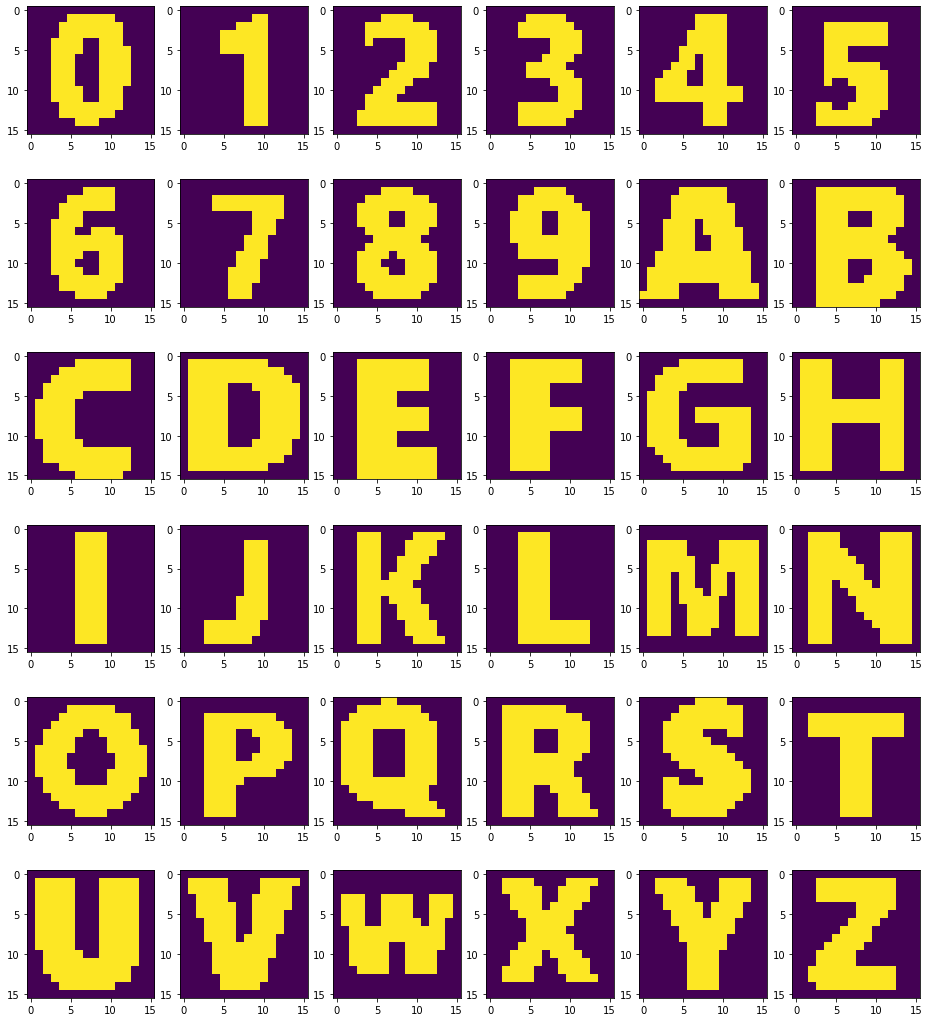

In [6]:
# Visualize training data from dataset 1
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)

for i,ax in enumerate(axes.flat):
#for i in range(image_num):
    ax.imshow(x_train[i].reshape(16,16))

In [7]:
# stage 1 DNN
import torch
import torch.nn as nn
class DNN_first_stage(nn.Module):

    def __init__(self):
        super(DNN_first_stage, self).__init__()
        self.fc1 = nn.Linear(16*16, 16*16*2)
        self.fc2 = nn.Linear(16*16*2, 16*16*4)
        self.fc3 = nn.Linear(16*16*4, 8)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        output = self.sigmoid(self.fc3(x))
        return output

model = DNN_first_stage().to(device)
criterion = nn.BCELoss().to(device)
lr = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = lr)
Epoch = 5000

def eval_first_stage(x_tr, y_tr):
    model.eval()
    pred_tr = model(x_tr.float())
    loss = criterion(pred_tr,y_tr)
    print("BCE-Loss: ", loss.item())
    #pred_np = (pred_tr>0.5).float().detach().numpy()
    return pred_tr

def train_first_stage(Epoch, x_tr, y_tr):
    model.train()
    
    for epoch in range(Epoch):
        optimizer.zero_grad()
        pred_tr = model(x_tr)
        # Compute Loss
        loss = criterion(pred_tr, y_tr)

        if epoch%(Epoch/10)==0:
            print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
        # Backward pass
        loss.backward()
        optimizer.step()


In [8]:
x_train = x_train.to(device)
y_train = y_train.to(device)

In [9]:
# training stage 1 DNN
print("Training...")
train_first_stage(Epoch, x_train, y_train)

Training...
Epoch 0: train loss: 0.6860424876213074
Epoch 500: train loss: 0.2245110422372818
Epoch 1000: train loss: 0.1904934048652649
Epoch 1500: train loss: 0.18012356758117676
Epoch 2000: train loss: 0.17638395726680756
Epoch 2500: train loss: 0.17477495968341827
Epoch 3000: train loss: 0.17398829758167267
Epoch 3500: train loss: 0.17355330288410187
Epoch 4000: train loss: 0.17328616976737976
Epoch 4500: train loss: 0.1731092929840088


In [10]:
# evaluate stage 1 result
pred_train_1 = eval_first_stage(x_train, y_train)

BCE-Loss:  0.1729852855205536


In [28]:
# prepare stage 2 training data
x2_train, y2_train = y_train.clone().to(device), x_train.clone().to(device)

In [29]:
# stage 2 DNN
class DNN_second_stage(nn.Module):

    def __init__(self):
        super(DNN_second_stage, self).__init__()
        self.fc1 = nn.Linear(8, 64)
        self.fc2 = nn.Linear(64, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 256)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        output = self.sigmoid(self.fc4(x))
        return output

model_stage_2 = DNN_second_stage().to(device)
criterion = nn.BCELoss().to(device)
lr = 0.5
optimizer = torch.optim.SGD(model_stage_2.parameters(), lr = lr)
Epoch = 10000

def eval_second_stage(x_tr, y_tr):
    model_stage_2.eval()
    pred_tr = model_stage_2(x_tr.float())
    loss = criterion(pred_tr,y_tr)
    print("BCE-Loss: ", loss.item())
    pred_np = (pred_tr>0.5).float().detach().cpu().numpy()
    return (pred_tr, pred_np)

def train_second_stage(Epoch, x_tr, y_tr):
    model_stage_2.train()
    
    for epoch in range(Epoch):
        optimizer.zero_grad()
        pred_tr = model_stage_2(x_tr)
        # Compute Loss
        loss = criterion(pred_tr, y_tr)

        if epoch%(Epoch/10)==0:
            print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
        # Backward pass
        loss.backward()
        optimizer.step()


In [30]:
# training stage 2 DNN
print("Training...")
train_second_stage(Epoch, x2_train, y2_train)

Training...
Epoch 0: train loss: 0.6920822262763977
Epoch 1000: train loss: 0.4144786298274994
Epoch 2000: train loss: 0.3747897446155548
Epoch 3000: train loss: 0.3369094133377075
Epoch 4000: train loss: 0.26725971698760986
Epoch 5000: train loss: 0.2092941701412201
Epoch 6000: train loss: 0.15806461870670319
Epoch 7000: train loss: 0.13111932575702667
Epoch 8000: train loss: 0.11901731044054031
Epoch 9000: train loss: 0.11439164727926254


In [31]:
# evaluate stage 2 trainig result
pred_train_2, pred_numpy_2 = eval_second_stage(x2_train, y2_train)

BCE-Loss:  0.11182970553636551


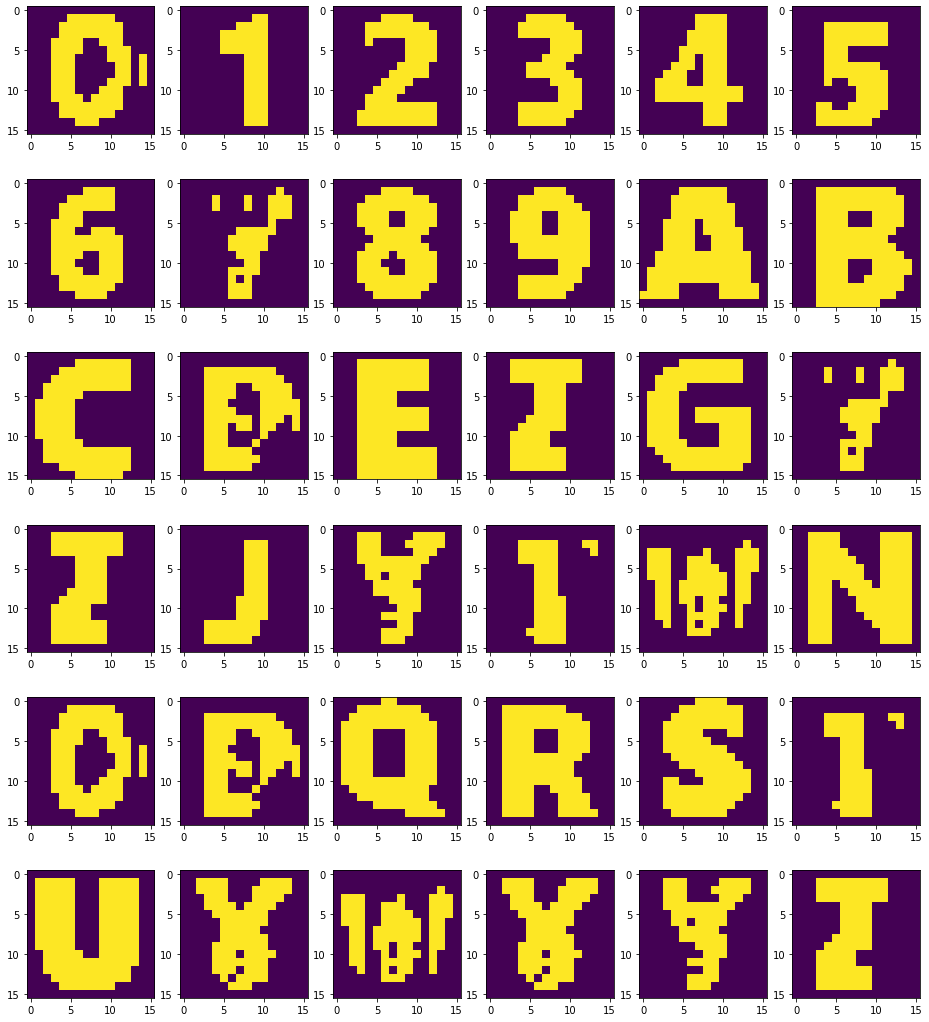

In [32]:
# show the result evaluation of stage 2, to see whether the model works well
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)
for i,ax in enumerate(axes.flat):
    ax.imshow(pred_numpy_2[i].reshape(16,16))

In [33]:
# Combine stage 1 and stage 2 to do the evaluation (use the output of stage 1 as the input of stage 2)
pred_stage_1 = eval_first_stage(x_train, y_train)
pred_stage_2, pred_numpy_stage_2 = eval_second_stage(pred_stage_1, y2_train)

BCE-Loss:  0.1729852855205536
BCE-Loss:  0.11139571666717529


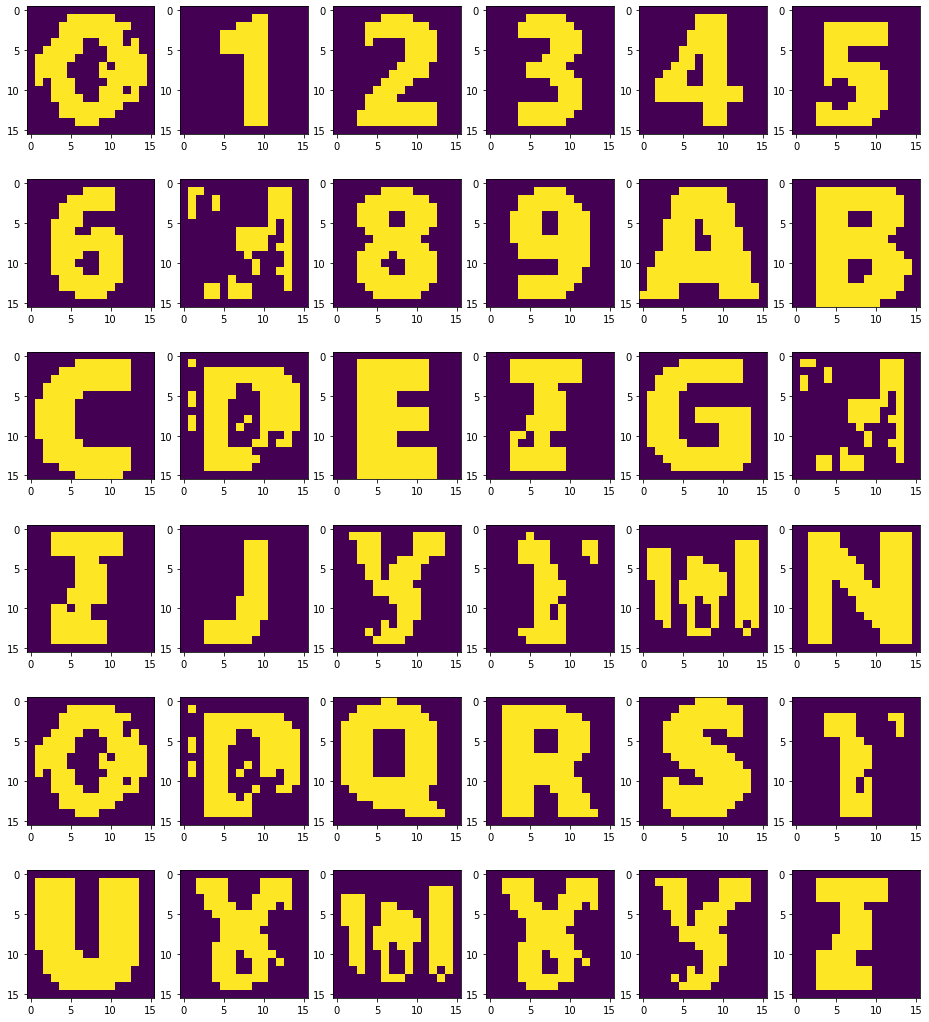

In [19]:
# show the result evaluation of the (stage 1 + stage 2 ) networks
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)
for i,ax in enumerate(axes.flat):
    ax.imshow(pred_numpy_stage_2[i].reshape(16,16))

In [34]:
# Get images from dataset 2
path = "../data/data2/"
images_data2, image_num2 = get_images_data(path)
x2 = torch.from_numpy(images_data2).float()

# encode the features
encode_feature = np.array([
    # dash v-line slant+ slant- rightbow leftbow downbow topbow
    [0,0,0,0,0,0,1,1], #0
    [0,1,0,0,0,0,0,0], #1
    [1,0,0,0,0,1,0,0], #2
    [0,0,0,0,0,2,0,0], #3
    [1,1,1,0,0,0,0,0], #4
    [1,1,0,0,0,1,0,0], #5
    [0,0,0,0,1,0,1,1], #6
    [1,2,0,0,0,0,0,0], #7
    [0,0,0,0,2,2,0,0], #8
    [0,1,0,0,1,1,0,0], #9
    [1,0,1,1,0,0,0,0], #A
    [0,1,0,0,0,2,0,0], #B
    [0,0,0,0,1,0,0,0], #C
    [0,1,0,0,0,1,0,0], #D
    [3,1,0,0,0,0,0,0], #E
    [2,1,0,0,0,0,0,0], #F
    [1,1,0,0,1,0,0,0], #G
    [1,2,0,0,0,0,0,0], #H
    [2,1,0,0,0,0,0,0], #I
    [1,1,0,0,0,0,1,0], #J
    [0,1,1,1,0,0,0,0], #K
    [1,1,0,0,0,0,0,0], #L
    [0,0,2,2,0,0,0,0], #M
    [0,0,2,1,0,0,0,0], #N
    [0,0,0,0,0,0,1,1], #O
    [0,1,0,0,0,1,0,0], #P
    [0,0,0,1,1,1,0,0], #Q
    [0,1,0,1,0,1,0,0], #R
    [0,0,0,0,1,1,0,0], #S
    [1,1,0,0,0,0,0,0], #T
    [0,0,0,0,0,0,1,0], #U
    [0,0,1,1,0,0,0,0], #V
    [0,0,2,2,0,0,0,0], #W
    [0,0,1,1,0,0,0,0], #X
    [0,1,1,1,0,0,0,0], #Y
    [2,1,0,0,0,0,0,0]  #Z
])
max_feature_number = 3
encode_feature = encode_feature/max_feature_number # Normalize
y2 = torch.from_numpy(encode_feature).float()

In [38]:
x2 = x2.to(device)
y2 = y2.to(device)
# prepare stage 2 testing data
x2_test2, y2_test2 = y2.clone(), x2.clone()

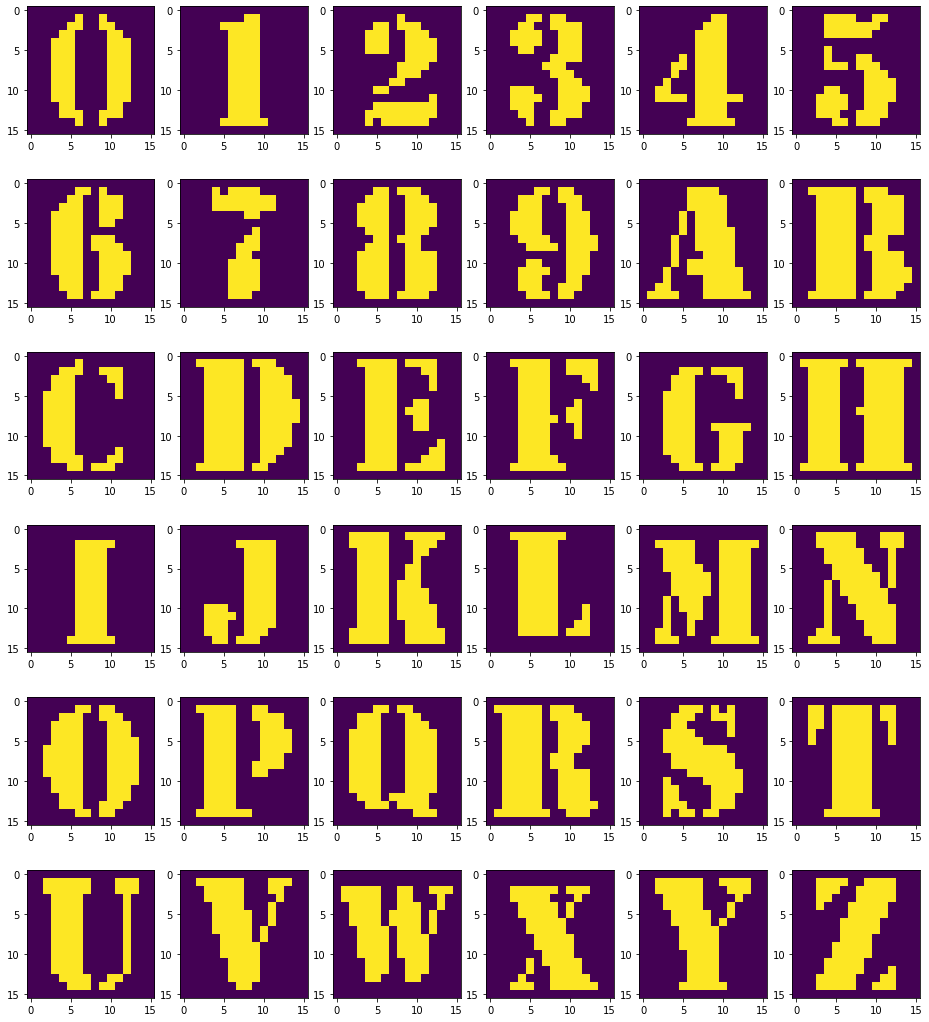

In [40]:
# Visualize images from dataset 2
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)

for i,ax in enumerate(axes.flat):
#for i in range(image_num):
    ax.imshow(x2[i].reshape(16,16).cpu())

In [41]:
pred2_stage_1 = eval_first_stage(x2, y2)
pred2_stage_2, pred2_numpy_stage2 = eval_second_stage(pred2_stage_1,y2_test2)



for i in range(0,36):
    print(pred2_numpy_stage2[i].reshape(16,16))

BCE-Loss:  0.3572103679180145
BCE-Loss:  2.455401659011841
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1.

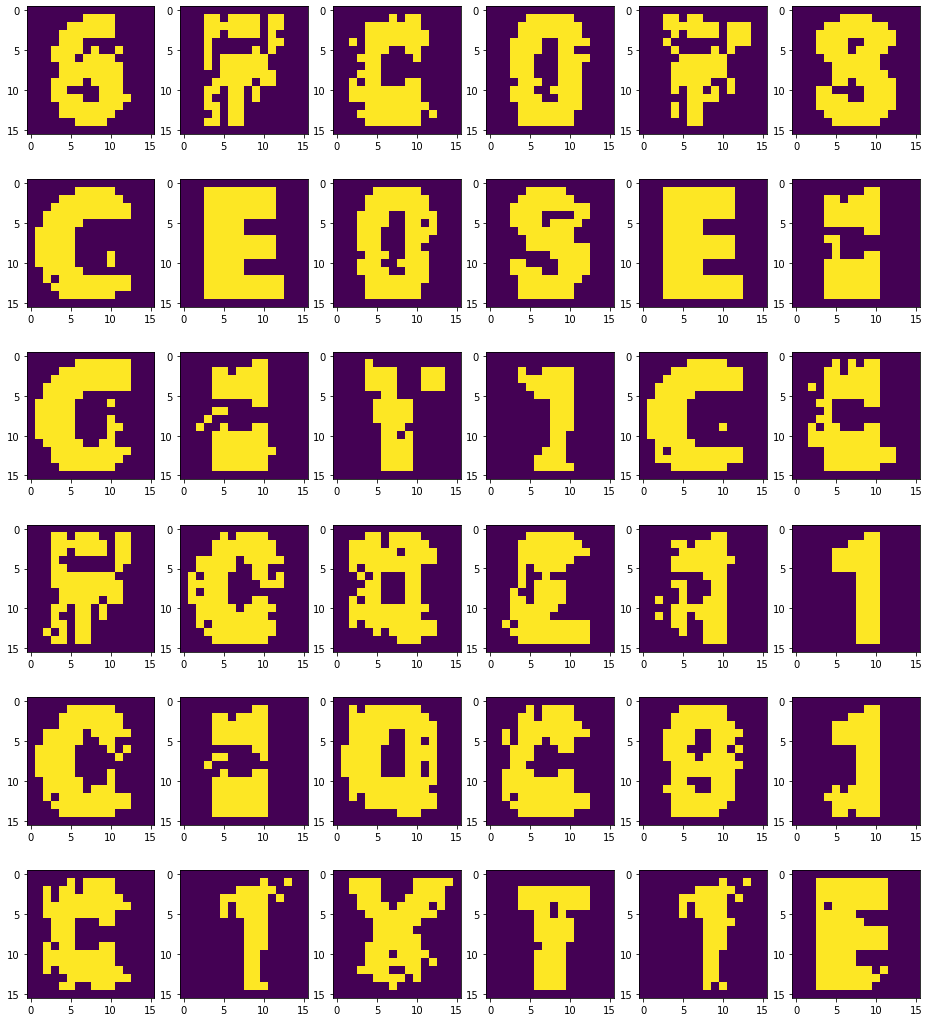

In [42]:
# step 4b predicted outcome
fig, axes = plt.subplots(6,6, figsize=(16,16))
plt.subplots_adjust(bottom=0.3, top=1.2, hspace=0)
for i,ax in enumerate(axes.flat):
    ax.imshow(pred2_numpy_stage2[i].reshape(16,16))

In [44]:
yhat_plus_y = np.add(pred_numpy_stage_2, y2_train.detach().cpu().numpy())
Fh = np.array([sum(yhat_plus_y[i] == 0)/sum(y2_train[i].cpu() == 0) for i in range(36)])

# after subtraction every entry with value -1 would be points falsely predicted as black
yhat_minus_y = np.subtract(pred_numpy_stage_2, y2_train.detach().cpu().numpy())
Ffa = np.array([sum(yhat_minus_y[i] == -1)/sum(y2_train[i].cpu() == 0) for i in range(36)])


#print(Fh)
#print(Ffa)
for i in range(Fh.size):
    print("The image {}   Fh: {:.3f}, Ffa: {:.3f}".format(i,Fh[i],Ffa[i]))

The image 0   Fh: 0.969, Ffa: 0.044
The image 1   Fh: 1.000, Ffa: 0.000
The image 2   Fh: 1.000, Ffa: 0.000
The image 3   Fh: 1.000, Ffa: 0.000
The image 4   Fh: 1.000, Ffa: 0.000
The image 5   Fh: 1.000, Ffa: 0.000
The image 6   Fh: 1.000, Ffa: 0.000
The image 7   Fh: 0.950, Ffa: 0.075
The image 8   Fh: 1.000, Ffa: 0.000
The image 9   Fh: 1.000, Ffa: 0.000
The image 10   Fh: 1.000, Ffa: 0.000
The image 11   Fh: 1.000, Ffa: 0.000
The image 12   Fh: 1.000, Ffa: 0.000
The image 13   Fh: 0.943, Ffa: 0.571
The image 14   Fh: 1.000, Ffa: 0.000
The image 15   Fh: 0.926, Ffa: 0.130
The image 16   Fh: 1.000, Ffa: 0.000
The image 17   Fh: 0.857, Ffa: 0.636
The image 18   Fh: 0.835, Ffa: 0.020
The image 19   Fh: 1.000, Ffa: 0.000
The image 20   Fh: 0.911, Ffa: 0.215
The image 21   Fh: 0.919, Ffa: 0.162
The image 22   Fh: 0.917, Ffa: 0.364
The image 23   Fh: 1.000, Ffa: 0.000
The image 24   Fh: 0.970, Ffa: 0.230
The image 25   Fh: 0.926, Ffa: 0.043
The image 26   Fh: 1.000, Ffa: 0.000
The image 2

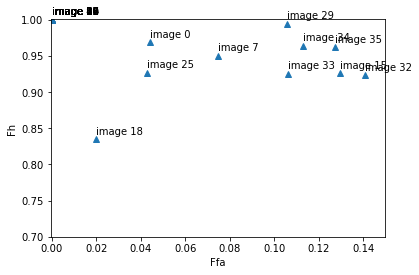

In [46]:
## step 4(d): (i) Visualize Ffa and Fh for data1
# IS IT POSSIBLE TO LABEL THE DATA POINTS BY THEIR CORRESPONDING NUMBERS??
plt.plot(Ffa, Fh, '^')
plt.axis([0, 1, 0, 1])
plt.xlabel('Ffa')
plt.ylabel('Fh')

for i in range(Fh.size):

    label = "image {}".format(i)

    plt.annotate(label,
                 (Ffa[i],Fh[i]),
                 textcoords="offset points",
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='left')  # left, right or center

# adjust axis ranges
plt.xlim(-0.0005,0.15)
plt.ylim(0.70,1.0005)

plt.show()

In [47]:
yhat_plus_y = np.add(pred2_numpy_stage2, y2_test2.detach().cpu().numpy())
Fh = np.array([sum(yhat_plus_y[i] == 0)/sum(y2_test2[i].cpu() == 0) for i in range(36)])

# after subtraction every entry with value -1 would be points falsely predicted as black
yhat_minus_y = np.subtract(pred2_numpy_stage2, y2_test2.detach().cpu().numpy())
Ffa = np.array([sum(yhat_minus_y[i] == -1)/sum(y2_test2[i].cpu() == 0) for i in range(36)])


#print(Fh)
#print(Ffa)
for i in range(Fh.size):
    print("The image {}   Fh: {:.3f}, Ffa: {:.3f}".format(i,Fh[i],Ffa[i]))

The image 0   Fh: 0.801, Ffa: 0.097
The image 1   Fh: 0.804, Ffa: 0.090
The image 2   Fh: 0.779, Ffa: 0.105
The image 3   Fh: 0.810, Ffa: 0.054
The image 4   Fh: 0.793, Ffa: 0.186
The image 5   Fh: 0.781, Ffa: 0.037
The image 6   Fh: 0.793, Ffa: 0.142
The image 7   Fh: 0.670, Ffa: 0.024
The image 8   Fh: 0.892, Ffa: 0.114
The image 9   Fh: 0.821, Ffa: 0.092
The image 10   Fh: 0.719, Ffa: 0.117
The image 11   Fh: 0.859, Ffa: 0.578
The image 12   Fh: 0.765, Ffa: 0.005
The image 13   Fh: 0.848, Ffa: 0.530
The image 14   Fh: 0.888, Ffa: 0.259
The image 15   Fh: 0.841, Ffa: 0.324
The image 16   Fh: 0.768, Ffa: 0.099
The image 17   Fh: 0.793, Ffa: 0.603
The image 18   Fh: 0.761, Ffa: 0.100
The image 19   Fh: 0.711, Ffa: 0.074
The image 20   Fh: 0.801, Ffa: 0.260
The image 21   Fh: 0.824, Ffa: 0.071
The image 22   Fh: 0.765, Ffa: 0.483
The image 23   Fh: 0.915, Ffa: 0.327
The image 24   Fh: 0.803, Ffa: 0.166
The image 25   Fh: 0.819, Ffa: 0.283
The image 26   Fh: 0.792, Ffa: 0.044
The image 2

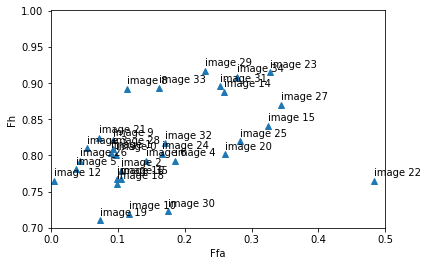

In [48]:
## step 4(d): (i) Visualize Ffa and Fh for data2
# IS IT POSSIBLE TO LABEL THE DATA POINTS BY THEIR CORRESPONDING NUMBERS??
plt.plot(Ffa, Fh, '^')
plt.axis([0, 1, 0, 1])
plt.xlabel('Ffa')
plt.ylabel('Fh')

for i in range(Fh.size):

    label = "image {}".format(i)

    plt.annotate(label,
                 (Ffa[i],Fh[i]),
                 textcoords="offset points",
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='left')  # left, right or center

# adjust axis ranges
plt.xlim(-0.0005,0.5)
plt.ylim(0.70,1.0005)

plt.show()

Cross_section : 10
--------------
BCE-Loss:  0.1730007380247116
BCE-Loss:  0.13998988270759583
BCE-Loss:  0.17303010821342468
BCE-Loss:  0.1662445366382599
BCE-Loss:  0.17306923866271973
BCE-Loss:  0.20297549664974213
BCE-Loss:  0.17322328686714172
BCE-Loss:  0.25953730940818787
BCE-Loss:  0.17369118332862854
BCE-Loss:  0.3959279954433441
BCE-Loss:  0.17546331882476807
BCE-Loss:  0.6377410888671875
BCE-Loss:  0.1789909154176712
BCE-Loss:  0.9632212519645691
BCE-Loss:  0.18493720889091492
BCE-Loss:  1.4313808679580688
BCE-Loss:  0.21063180267810822
BCE-Loss:  2.320075273513794
Table of Heteroassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 8

   Number of Weights in an Equivalent Single-Layer Perceptron = 8x256

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  8x64

   Number of Weights in Hidden Layer 2 = 64x512

   Number of Weights in Hidden Layer 3 = 512x1024

   Number of Outputs = 256

             -- Gaussian Noi

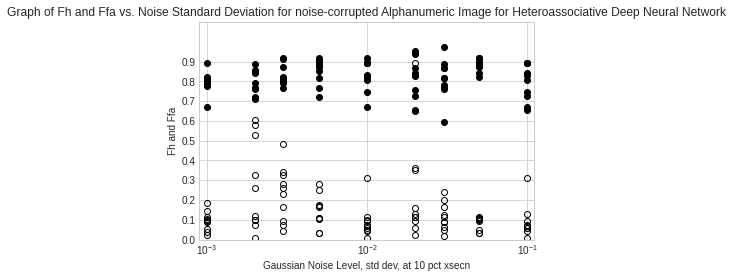

Cross_section : 20
--------------
BCE-Loss:  0.21063585579395294
BCE-Loss:  2.3231372833251953
BCE-Loss:  0.2106565535068512
BCE-Loss:  2.324838876724243
BCE-Loss:  0.2105637639760971
BCE-Loss:  2.32027530670166
BCE-Loss:  0.21040399372577667
BCE-Loss:  2.318436622619629
BCE-Loss:  0.2111189067363739
BCE-Loss:  2.3189234733581543
BCE-Loss:  0.2117689996957779
BCE-Loss:  2.323854684829712
BCE-Loss:  0.2128007411956787
BCE-Loss:  2.341217517852783
BCE-Loss:  0.2151821106672287
BCE-Loss:  2.3726284503936768
BCE-Loss:  0.2429555207490921
BCE-Loss:  2.8756535053253174
Table of Heteroassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 8

   Number of Weights in an Equivalent Single-Layer Perceptron = 8x256

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  8x64

   Number of Weights in Hidden Layer 2 = 64x512

   Number of Weights in Hidden Layer 3 = 512x1024

   Number of Outputs = 256

             -- Gaussian Noise Standard D

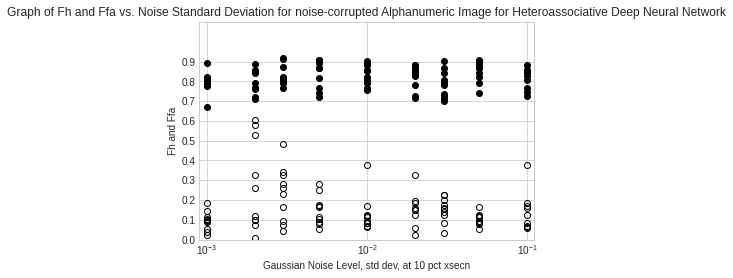

Cross_section : 25
--------------
BCE-Loss:  0.24294736981391907
BCE-Loss:  2.8753395080566406
BCE-Loss:  0.24298140406608582
BCE-Loss:  2.876844882965088
BCE-Loss:  0.24296638369560242
BCE-Loss:  2.8773446083068848
BCE-Loss:  0.24289508163928986
BCE-Loss:  2.881139039993286
BCE-Loss:  0.24276749789714813
BCE-Loss:  2.876084327697754
BCE-Loss:  0.24315376579761505
BCE-Loss:  2.9003970623016357
BCE-Loss:  0.24200327694416046
BCE-Loss:  2.8919239044189453
BCE-Loss:  0.24385370314121246
BCE-Loss:  2.92665958404541
BCE-Loss:  0.2651776373386383
BCE-Loss:  3.2436347007751465
Table of Heteroassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 8

   Number of Weights in an Equivalent Single-Layer Perceptron = 8x256

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  8x64

   Number of Weights in Hidden Layer 2 = 64x512

   Number of Weights in Hidden Layer 3 = 512x1024

   Number of Outputs = 256

             -- Gaussian Noise Sta

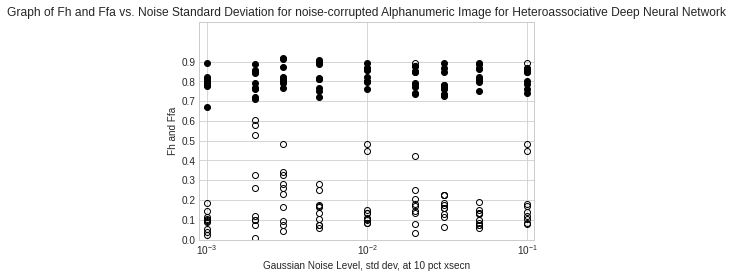

Cross_section : 30
--------------
BCE-Loss:  0.2651413381099701
BCE-Loss:  3.2456114292144775
BCE-Loss:  0.2652558386325836
BCE-Loss:  3.247300386428833
BCE-Loss:  0.2653508186340332
BCE-Loss:  3.246241331100464
BCE-Loss:  0.2652689516544342
BCE-Loss:  3.242851734161377
BCE-Loss:  0.26572173833847046
BCE-Loss:  3.251398801803589
BCE-Loss:  0.26550963521003723
BCE-Loss:  3.2588531970977783
BCE-Loss:  0.26437169313430786
BCE-Loss:  3.253563404083252
BCE-Loss:  0.2689630091190338
BCE-Loss:  3.3231852054595947
BCE-Loss:  0.2897953391075134
BCE-Loss:  3.5357067584991455
Table of Heteroassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 8

   Number of Weights in an Equivalent Single-Layer Perceptron = 8x256

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  8x64

   Number of Weights in Hidden Layer 2 = 64x512

   Number of Weights in Hidden Layer 3 = 512x1024

   Number of Outputs = 256

             -- Gaussian Noise Standard

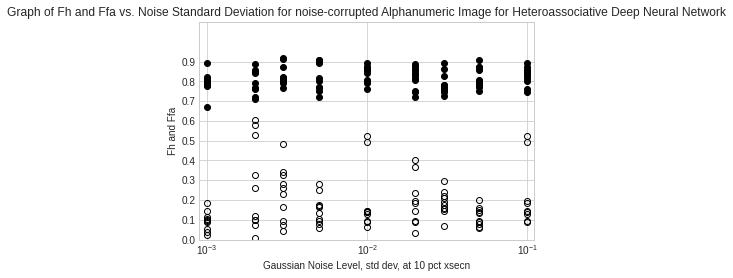

Cross_section : 35
--------------
BCE-Loss:  0.2898311913013458
BCE-Loss:  3.5361859798431396
BCE-Loss:  0.28984498977661133
BCE-Loss:  3.534475088119507
BCE-Loss:  0.2900087237358093
BCE-Loss:  3.535626173019409
BCE-Loss:  0.28976911306381226
BCE-Loss:  3.5345664024353027
BCE-Loss:  0.29078036546707153
BCE-Loss:  3.5375664234161377
BCE-Loss:  0.2910677492618561
BCE-Loss:  3.534132242202759
BCE-Loss:  0.2934953272342682
BCE-Loss:  3.557314157485962
BCE-Loss:  0.2995188236236572
BCE-Loss:  3.6598236560821533
BCE-Loss:  0.31341663002967834
BCE-Loss:  3.8310208320617676
Table of Heteroassociative Deep Neural Network Response to Noisy Input

   Number of Inputs  = 8

   Number of Weights in an Equivalent Single-Layer Perceptron = 8x256

   Number of Hidden Layers in This DNN = 3

   Number of Weights in Hidden Layer 1 =  8x64

   Number of Weights in Hidden Layer 2 = 64x512

   Number of Weights in Hidden Layer 3 = 512x1024

   Number of Outputs = 256

             -- Gaussian Noise Standa

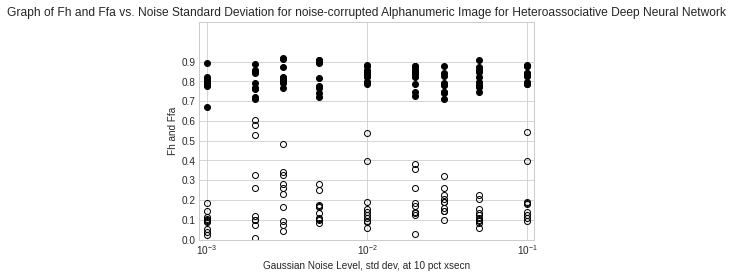

In [52]:
#step5
import random
seed = 1
sigma = np.array([0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1])
cross_section = np.array([10,20,25,30,35])

Fh_list = np.zeros(360) # 100 = 36 images * 10 sigma case
Ffa_list = np.zeros(360)

# Repeat the same procedure 10 times.We are calculating for 5 different cross-sections.
for k in range(5):
    print('Cross_section : {}'.format(cross_section[k]))
 
#     pred_stage_1 = eval_first_stage(x_train, y_train)
# pred_stage_2, pred_numpy_stage_2 = eval_second_stage(pred_stage_1, y2_train)
    print("--------------")

    Fh_temp_list = np.array([])
    Ffa_temp_list = np.array([])

    Fh_temp_list = np.append(Fh_temp_list, Fh) # stdev = 0
    Ffa_temp_list = np.append(Ffa_temp_list, Ffa) # stdev = 0

    for case in range(9):
        x = x_train
        for img in range(36):    
      
            for i in range(int(256*(cross_section[k]/100))):
                seed+=random.randint(0,100)
                random.seed(seed)
                rindex = torch.randint(int(i*100/cross_section[k]),int((i+1)*100/cross_section[k]),(1,)) #np.random.choice(range(i*cross_section[k],(i+1)*cross_section[k]))
                noise = torch.normal(0,sigma[case],(1,)).to(device) #np.random.normal(0,sigma[case],1) 
                x[img, rindex] += noise
            x[img] = x[img] - torch.min(x[img])
            x[img] = x[img] / torch.max(x[img])

        y = x

        pred_stage_1 = eval_first_stage(x, y_train)
        pred_stage_2, pred_numpy = eval_second_stage(pred_stage_1, y)

    # after summation every entry with value 0 would be points correctly predicted as black
        yhat_plus_y = np.add(pred_numpy, y2_test2.detach().cpu().numpy())
        Fh_temp = np.array([sum(yhat_plus_y[i] == 0)/sum(y2_test2[i].cpu() == 0) for i in range(36)])
        Fh_temp_list = np.append(Fh_temp_list, Fh_temp)

    # after subtraction every entry with value -1 would be points falsely predicted as black
        yhat_minus_y = np.subtract(pred_numpy, y2_test2.detach().cpu().numpy())
        Ffa_temp = np.array([sum(yhat_minus_y[i] == -1)/sum(y2_test2[i].cpu() == 0) for i in range(36)])
        Ffa_temp_list = np.append(Ffa_temp_list, Ffa_temp)


    Fh_list = Fh_temp_list
    Ffa_list = Ffa_temp_list

    print("Table of Heteroassociative Deep Neural Network Response to Noisy Input\n")
    print("   Number of Inputs  = 8\n")
    print("   Number of Weights in an Equivalent Single-Layer Perceptron = 8x256\n")   # not sure
    print("   Number of Hidden Layers in This DNN = 3\n")
    print("   Number of Weights in Hidden Layer 1 =  8x64\n")
    print("   Number of Weights in Hidden Layer 2 = 64x512\n")
    print("   Number of Weights in Hidden Layer 3 = 512x1024\n")
    print("   Number of Outputs = 256\n")
    print("             -- Gaussian Noise Standard Deviation - Cross Section Percent:{}".format(cross_section[k]))

    s1 = "#Test  stdev={:<6.3f}".format(0)
    s2 = "#Image {:<12}".format("Fh    Ffa")

    for sig in sigma:
        s1+="stdev={:<6.3f}".format(sig)
        s2+="{:<12}".format("Fh    Ffa")
    print(s1+"\n"+s2+"\n")

    Fh_matrix = Fh_list.reshape(10,36).transpose()
    Ffa_matrix = Ffa_list.reshape(10,36).transpose()

    for i in range(36):
        s = '"{}"    '.format(i)
        for case in range(10):
            s+="{:<6.2f}".format(Fh_matrix[i][case])
            s+="{:<6.2f}".format(Ffa_matrix[i][case])
        print(s)

    # print(Ffa_list)
    # print(Fh_list)

    # Step 6b

    %matplotlib inline
    import matplotlib.pyplot as plt
    import pylab

    plt.style.use('seaborn-whitegrid')
    for i in range(0,10):
        #SD=0.001
        plt.plot(0.001,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.001,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(10,20):
        #SD=0.002
        plt.plot(0.002,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.002,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(20,30):
        #SD=0.003
        plt.plot(0.003,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.003,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(30,40):
        #SD=0.005
        plt.plot(0.005,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.005,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(40,50):
        #SD=0.01
        plt.plot(0.01,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.01,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(50,60):
        #SD=0.02
        plt.plot(0.02,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.02,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(60,70):
        #SD=0.03
        plt.plot(0.03,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.03,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(70,80):
        #SD=0.05
        plt.plot(0.05,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.05,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
    for i in range(80,90):
        #SD=0.1
        plt.plot(0.1,Fh_list[i:i+1], 'o', color='black')
        plt.plot(0.1,Ffa_list[i:i+1], 'o', color='black', markerfacecolor='none')
        
    plt.xscale('log')
    plt.xlabel('Gaussian Noise Level, std dev, at 10 pct xsecn')
    plt.ylabel('Fh and Ffa')
    plt.title('Graph of Fh and Ffa vs. Noise Standard Deviation for noise-corrupted Alphanumeric Image for Heteroassociative Deep Neural Network')
    plt.yticks(np.arange(0,1,0.1))
    plt.xlim([0.0009,0.1101])
    plt.ylim([0,1.1])

    plt.show()